<a href="https://colab.research.google.com/github/Gimena2024/PROYECTO_FINAL_DS_II_GIMENA_CRUZ/blob/main/PROTECTO_FINAL_DS_II_GIMENA_CRUZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DETECCION DE FRAUDE EN TRANSACCIONES CON  CC(credict cards)**     

DETECCIÓN IN credit cards- Proyecto Final DataScience II -



Gimena Cruz

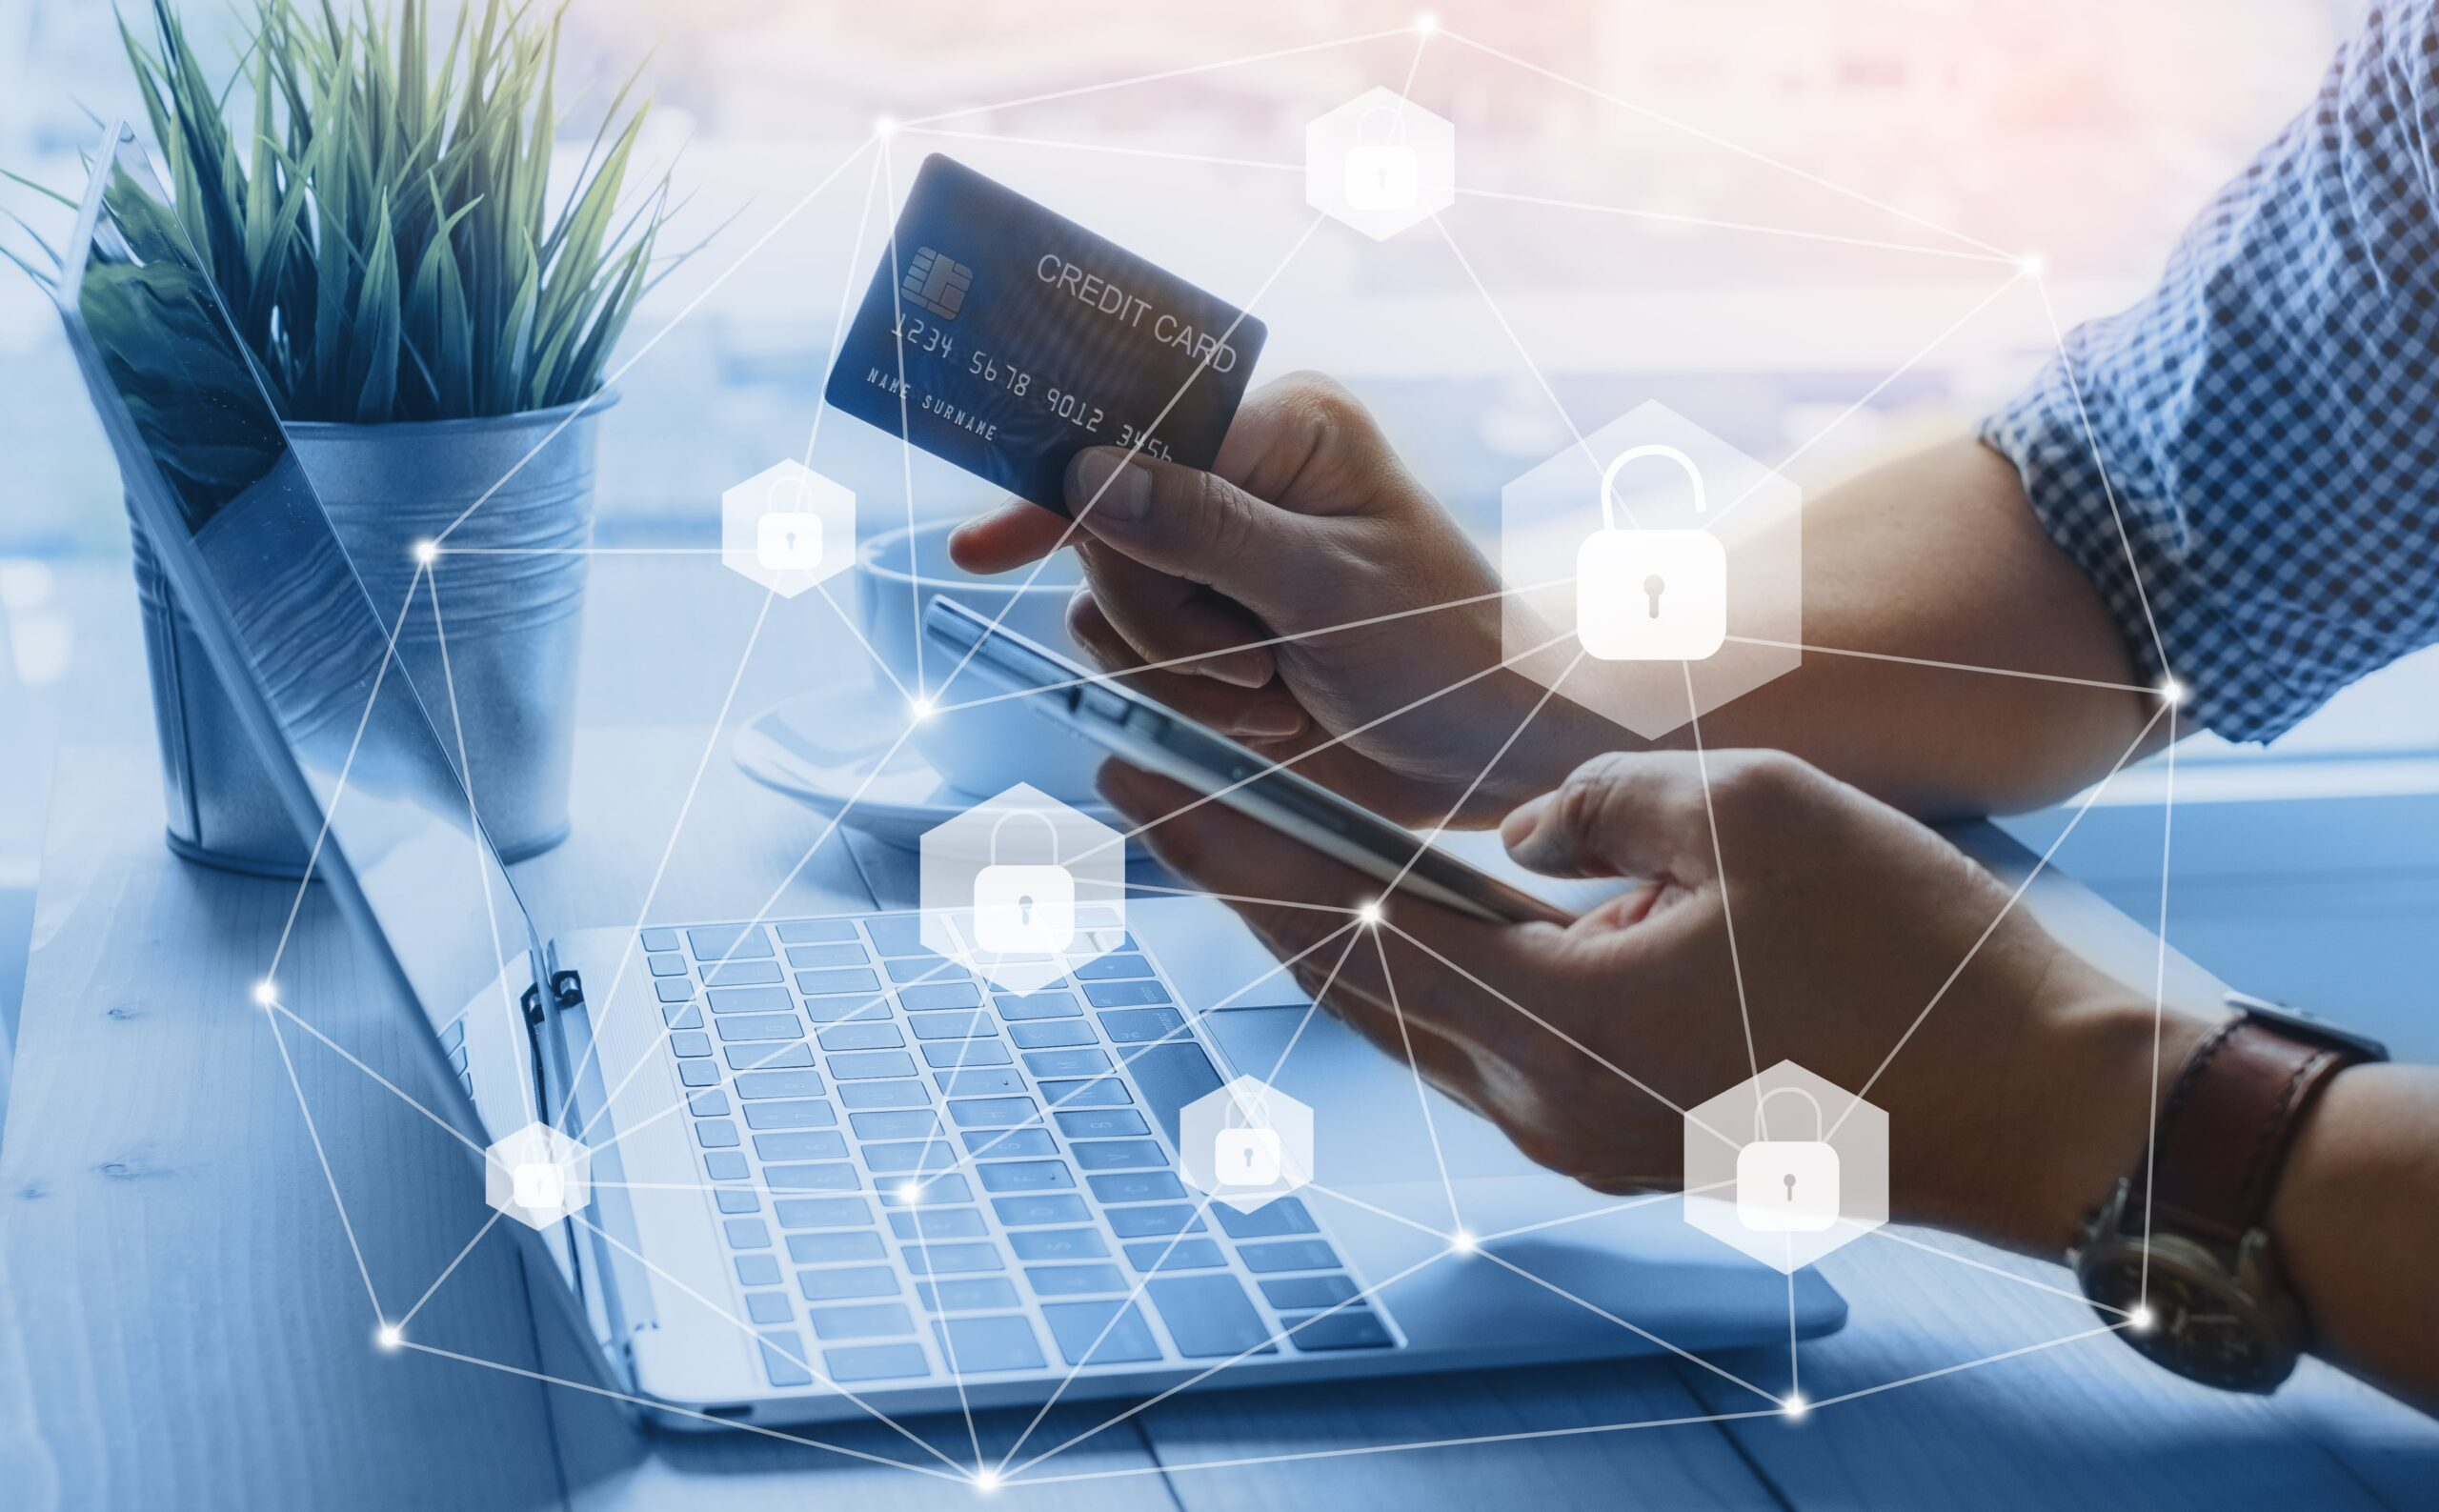
imagen(https://www.google.com/imgres?imgurl=https://daa1df3k0xsds.cloudfront.net/wp-content/uploads/2023/12/transacciones-electronicas-min-scaled.jpg&imgrefurl=https://www.camerfirma.com/seguridad-transacciones-electronicas/&h=1587&w=2560&tbnid=EzFf-EUPu8WzAM&source=sa.im&tbnh=177&tbnw=285&usg=AI4_-kSscmPqICp03eQLOTP88JfuvkV3ZA&vet=1&docid=m6jb3bXHj0V79M)

## Enlace a Github:
https://github.com/Gimena2024/PROYECTO_FINAL_DS_II_GIMENA_CRUZ.git

##                             **IS FRAUD? (variable predictora)**

**ABSTRACTO CON MOTIVACION Y AUDIENCIA**

La detección de fraude es un aspecto esencial de las transacciones con tarjetas de crédito. El impacto negativo es significativo tanto para las  instituciones financieras emisoras como para los clientes (titulares y comerciantes). Hace tiempo, el modo en que se podían evitar se hacía mediante **revisiones manuales** y periódicas totalmente ineficaces e inoportunas. Los tiempos han cambiado y nuestro objetivo es **diseñar un modelo de Machine Learning** que pueda predecir en forma satisfactoria estas transacciones de modo que se puedan generar alertas tempranas y evitar daños económicos a todas las partes.-

**PREGUNTAS DE INTERES / HIPOTESIS**

 ***Hipótesis***: Las transacciones fraudulentas se efectúan por **única vez** con la misma tarjeta, ya que al ser detectadas por el sistema (comerciante, emisor)en forma rápida, no pueden volver a utilizarse.-

 ***Preguntas***:
*   Es posible **detectar** estas tarjetas y denunciarlas a tiempo para no
    cometer futuras transacciones fraudulentas?
*   De todas las transacciones efectuadas cuántas son fraude?
*   Cuál es es porcentaje de fraude?
*   Cuál es la estadística de transacciones fraudulentas por tarjeta?
*   Se utilizaron varias veces el mismo día?
*   Son los montos relevantes en las transacciones fraudulentas?
*   Tiene alguna relaciòn relevante la edad de las personas que realizan los
    fraude?
*   Tiene relaciòn la cantidad poblaciòn de las ciudades con los titulares      
    de    tarjetas fraudulentas?
*   Se realizan màs transacciones fraudulentas durante los horarios **AM** o   
    **PM**?
*   Varían los comerciantes por cada tarjeta fraudulenta?
  
**ANALISIS EXPLORATORIO DE DATOS (EDA)**

Los datos a explorar provienen de un Dataset extraído de KAGGLE(), recopilados en EEUU periodo 01-01-2019 al 21-06-2020.- Esta base de datos contiene más de un millón de transacciones con distintos atributos los cuáles se analizarán para su limpieza, transformación,  selección, obtención de estadísticas,  visualizaciones e insights . Con un objetivo final: despliegue del modelo de ML.

**METADATA**


**Dataset "original"**: 1.296.675 filas y 23 columnas. Al tener una desproporciòn en cantidades de fraude y no fraude, se decide reducir las transacciones no fraude en forma representativa quedando:

**Dataset "short"**: 15506 filas ( de las cuales 7506 son fraude y 8000 no fraude) y 22 columnas :

trans_date_trans_time  datetime64
cc_num                 int64         
merchant               object        
category               object        
amt                    float64       
gender                 object        
city                   object        
state                  object        
zip                    int64         
lat                    float64       
long                   float64       
city_pop               int64         
job                    object        
dob                    datetime64
trans_num              object        
is_fraud               int64         
density                int64         
trans_date             datetime64
AM_PM                  object        
age                    int64         
day_name               object        
IIN                    int64  

**Dataset "modelo"**: 15506 filas y 14 columnas numèricas utilizando Encoding e  Ingeniería de atributos. Se utilizará para ML.







## DATA SET ORIGINAL (Colab-Google Drive) "**transacciones_original**"

Comenzamos con el **dataset completo** el cual deberemos reducir porque no permite Github hostearlo alli por su tamaño.- Luego de reducirlo lo transformaremos a csv y lo hostearemos en Github.-

In [ ]:
#Importamos librerias necesarias.
import matplotlib as mpl
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [ ]:
#Establecemos el entorno de trabajo conectando a la base de datos que está en Google drive.
!gdown 1jjDF4v4L1lawnsNO6YPZJcYZqUzpftdh

Downloading...
From (original): https://drive.google.com/uc?id=1jjDF4v4L1lawnsNO6YPZJcYZqUzpftdh
From (redirected): https://drive.google.com/uc?id=1jjDF4v4L1lawnsNO6YPZJcYZqUzpftdh&confirm=t&uuid=e4259a24-ca14-4427-b41e-912a43c5efc4
To: /content/Credit_Card_Transactions_DSII.csv
100% 354M/354M [00:06<00:00, 54.6MB/s]


In [ ]:
#Leemos con pandas el dataset y comenzamos a analizarlo.
pd.read_csv("/content/Credit_Card_Transactions_DSII.csv",index_col=0).head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [ ]:
#Nombramos el dataset original y lo examinamos .
transacciones_original=pd.read_csv("Credit_Card_Transactions_DSII.csv",index_col=0)
transacciones_original.head(3)


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0


In [ ]:
#Solicitamos informacion del mismo (columnas, nulos, tipo de datos).
transacciones_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

In [ ]:
#Total de transacciones originales. Cantidad de columnas y filas del original.
transacciones_original.shape

(1296675, 23)

#DATA WRANGLING

## DATASET 1ER.PROCESAMIENTO. "**transacciones_long**"

In [ ]:
#Dejamos el original intacto y continuamos con "long" que es una copia del mismo.-
transacciones_long=transacciones_original.copy()

In [ ]:
#Borramos columnas innecesarias.
transacciones_long.drop(['street','last','first' ], axis=1, inplace=True)


In [ ]:
#Volvemos a observar dtype, duplicados, nulos y dataset en gral.
transacciones_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   gender                 1296675 non-null  object 
 6   city                   1296675 non-null  object 
 7   state                  1296675 non-null  object 
 8   zip                    1296675 non-null  int64  
 9   lat                    1296675 non-null  float64
 10  long                   1296675 non-null  float64
 11  city_pop               1296675 non-null  int64  
 12  job                    1296675 non-null  object 
 13  dob                    1296675 non-null  object 
 14  trans_num              

In [ ]:
#Seleccionamos estas columnas porque sospecho que tienen datos similares.
print(transacciones_long[["zip","merch_zipcode"]])

              zip  merch_zipcode
Unnamed: 0                      
0           28654        28705.0
1           99160            NaN
2           83252        83236.0
3           59632            NaN
4           24433        22844.0
...           ...            ...
1296670     84735            NaN
1296671     21790        22630.0
1296672     88325        88351.0
1296673     57756        69367.0
1296674     59871        59870.0

[1296675 rows x 2 columns]


In [ ]:
#Decidimos eliminar columna merch por contener información duplicada y  nulos.
transacciones_long.drop('merch_zipcode', axis=1, inplace=True)

In [ ]:
#Traemos estas columnas para ver los datos que contienen.
print(transacciones_long[["trans_date_trans_time","trans_num","unix_time","merch_lat","merch_long","lat","long","is_fraud"]])

           trans_date_trans_time                         trans_num  \
Unnamed: 0                                                           
0            2019-01-01 00:00:18  0b242abb623afc578575680df30655b9   
1            2019-01-01 00:00:44  1f76529f8574734946361c461b024d99   
2            2019-01-01 00:00:51  a1a22d70485983eac12b5b88dad1cf95   
3            2019-01-01 00:01:16  6b849c168bdad6f867558c3793159a81   
4            2019-01-01 00:03:06  a41d7549acf90789359a9aa5346dcb46   
...                          ...                               ...   
1296670      2020-06-21 12:12:08  440b587732da4dc1a6395aba5fb41669   
1296671      2020-06-21 12:12:19  278000d2e0d2277d1de2f890067dcc0a   
1296672      2020-06-21 12:12:32  483f52fe67fabef353d552c1e662974c   
1296673      2020-06-21 12:13:36  d667cdcbadaaed3da3f4020e83591c83   
1296674      2020-06-21 12:13:37  8f7c8e4ab7f25875d753b422917c98c9   

             unix_time  merch_lat  merch_long      lat      long  is_fraud  
Unnamed: 0  

In [ ]:
#Verificamos que lat, long  y "merch_lat","merch_long" contienen los  datos parecidos  y decidimos eliminarlas.
transacciones_long.drop(["merch_lat","merch_long"], axis=1, inplace=True)

In [ ]:
#Vamos a cambiar tipo de dato de variable 'dob' a tipo fecha.
transacciones_long['dob'] = pd.to_datetime(transacciones_long['dob'])
transacciones_long['dob'].dtype
print(transacciones_long['dob'])

Unnamed: 0
0         1988-03-09
1         1978-06-21
2         1962-01-19
3         1967-01-12
4         1986-03-28
             ...    
1296670   1961-11-24
1296671   1979-12-11
1296672   1967-08-30
1296673   1980-08-18
1296674   1995-08-16
Name: dob, Length: 1296675, dtype: datetime64[ns]


In [ ]:
#Vamos a cambiar tipo de dato de variable 'trans_date_trans_time' a tipo fecha.
transacciones_long["trans_date_trans_time"] = pd.to_datetime(transacciones_long["trans_date_trans_time"])
transacciones_long["trans_date_trans_time"].dtype
print(transacciones_long["trans_date_trans_time"])


Unnamed: 0
0         2019-01-01 00:00:18
1         2019-01-01 00:00:44
2         2019-01-01 00:00:51
3         2019-01-01 00:01:16
4         2019-01-01 00:03:06
                  ...        
1296670   2020-06-21 12:12:08
1296671   2020-06-21 12:12:19
1296672   2020-06-21 12:12:32
1296673   2020-06-21 12:13:36
1296674   2020-06-21 12:13:37
Name: trans_date_trans_time, Length: 1296675, dtype: datetime64[ns]


In [ ]:
#Vamos a crear columna trans_date  con función lambda para poder calcular la edad del titular de quien realiza la transacción, luego se eliminará
#antes de aplicar el modelo de ML.
transacciones_long['trans_date'] = transacciones_long['trans_date_trans_time'].apply(lambda x: pd.to_datetime(x).date())
print(transacciones_long['trans_date'])

Unnamed: 0
0          2019-01-01
1          2019-01-01
2          2019-01-01
3          2019-01-01
4          2019-01-01
              ...    
1296670    2020-06-21
1296671    2020-06-21
1296672    2020-06-21
1296673    2020-06-21
1296674    2020-06-21
Name: trans_date, Length: 1296675, dtype: object


In [ ]:
#cambiamos el tipo de dato porque en la instrucción anterior no lo tomó.
transacciones_long['trans_date'] = pd.to_datetime(transacciones_long['trans_date_trans_time'].apply(lambda x: pd.to_datetime(x).date()))
transacciones_long['trans_date'].dtype
print(transacciones_long['trans_date'])

Unnamed: 0
0         2019-01-01
1         2019-01-01
2         2019-01-01
3         2019-01-01
4         2019-01-01
             ...    
1296670   2020-06-21
1296671   2020-06-21
1296672   2020-06-21
1296673   2020-06-21
1296674   2020-06-21
Name: trans_date, Length: 1296675, dtype: datetime64[ns]


In [ ]:
# Obtenemos el período entre  la fecha mínima y máxima del data set.
fecha_minima = transacciones_long['trans_date'].min()
fecha_maxima = transacciones_long['trans_date'].max()

print(f'Rango de trans_date: {fecha_minima} a {fecha_maxima}')

Rango de trans_date: 2019-01-01 00:00:00 a 2020-06-21 00:00:00


In [ ]:
#Vamos a crear columna   trans_time  con función lambda con la finalidad de determinar horarios AM PM.
transacciones_long['trans_time'] = transacciones_long['trans_date_trans_time'].apply(lambda x: pd.to_datetime(x).time())
print(transacciones_long['trans_time'])

Unnamed: 0
0          00:00:18
1          00:00:44
2          00:00:51
3          00:01:16
4          00:03:06
             ...   
1296670    12:12:08
1296671    12:12:19
1296672    12:12:32
1296673    12:13:36
1296674    12:13:37
Name: trans_time, Length: 1296675, dtype: object


In [ ]:
# Creamos la nueva columna 'AM_PM', luego para el modelo los transformaremos en 0(AM), 1(PM).
transacciones_long['AM_PM'] = transacciones_long['trans_time'].apply(lambda x: 'AM' if x.hour < 12 else 'PM')
print(transacciones_long[['trans_time', 'AM_PM']])

           trans_time AM_PM
Unnamed: 0                 
0            00:00:18    AM
1            00:00:44    AM
2            00:00:51    AM
3            00:01:16    AM
4            00:03:06    AM
...               ...   ...
1296670      12:12:08    PM
1296671      12:12:19    PM
1296672      12:12:32    PM
1296673      12:13:36    PM
1296674      12:13:37    PM

[1296675 rows x 2 columns]


In [ ]:
#Eliminamos la columna trans_time porque no la utilizaremos.
transacciones_long.drop('trans_time', axis=1, inplace=True)

In [ ]:
# Creamos  la columna 'age' y efectuamos el cálculo de los años de quien efectúa la transacción.
transacciones_long['age'] = transacciones_long.apply(lambda row: row['trans_date'].year - row['dob'].year - ((row['trans_date'].month, row['trans_date'].day) <
(row['dob'].month, row['dob'].day)), axis=1)
print(transacciones_long[['dob', 'trans_date', 'age']])

                  dob trans_date  age
Unnamed: 0                           
0          1988-03-09 2019-01-01   30
1          1978-06-21 2019-01-01   40
2          1962-01-19 2019-01-01   56
3          1967-01-12 2019-01-01   51
4          1986-03-28 2019-01-01   32
...               ...        ...  ...
1296670    1961-11-24 2020-06-21   58
1296671    1979-12-11 2020-06-21   40
1296672    1967-08-30 2020-06-21   52
1296673    1980-08-18 2020-06-21   39
1296674    1995-08-16 2020-06-21   24

[1296675 rows x 3 columns]


In [ ]:
#Nos queda un dataset con una 1ra.depuración.
transacciones_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   city                   1296675 non-null  object        
 7   state                  1296675 non-null  object        
 8   zip                    1296675 non-null  int64         
 9   lat                    1296675 non-null  float64       
 10  long                   1296675 non-null  float64       
 11  city_pop               1296675 non-null  int64         
 12  job                    1296675 no

# ANALISIS EXPLORATORIO DE DATOS - EDA (Exploratory Data Analysis).

In [ ]:
#Combinamos con este estilo en seaborn.
sns.set_style("white")

## SUB-DATAFRAME (basados **Fraude si/no**)

**PREGUNTA**:De todas las transacciones efectuadas cuántas son fraude?

In [ ]:
#Establecemos el conteo de la variable predictora "is fraud".
transacciones_totales_conteo= transacciones_long['is_fraud'].value_counts()
transacciones_totales_conteo

,count
is_fraud,
0,1289169
1,7506


**RTA.**:Del 1.289.169 de transacciones totales, **7506** son **fraude**.

**PREGUNTA:**Cuál es es porcentaje de fraude?

---



In [ ]:
#Establecemos el procentaje.
transacciones_totales_porcentaje = transacciones_long['is_fraud'].value_counts(normalize=True) * 100
transacciones_totales_porcentaje

,proportion
is_fraud,
0,99.421135
1,0.578865


**RTA.**en gráfico

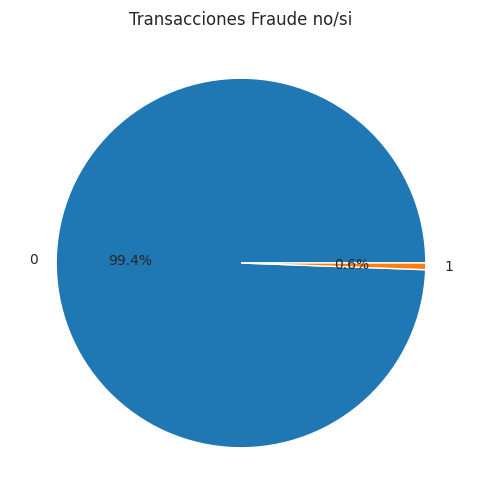

In [ ]:
#Se crea este gráfico para comprender las dimensiones de fraude no (0), fraude si (1).
plt.figure(figsize=(10, 6))
plt.pie(transacciones_totales_conteo, labels=transacciones_totales_conteo.index, autopct='%1.1f%%')
plt.title('Transacciones Fraude no/si')
plt.show()



Al tratarse de una relación tan desproporcionada, vamos a trabajar principalmente sobre el análisis de los fraudes si (0.6%) y obtener insigths sobre este grupo en particular.

In [ ]:
#Totales y Porcentajes juntos .
df_totales_conteo_porcentaje  = pd.DataFrame({'Conteo': transacciones_totales_conteo, 'Porcentaje': transacciones_totales_porcentaje})
df_totales_conteo_porcentaje = df_totales_conteo_porcentaje.round(2)
print(df_totales_conteo_porcentaje )

           Conteo  Porcentaje
is_fraud                     
0         1289169       99.42
1            7506        0.58


**PREGUNTA**:Hay transacciones duplicadas en el dataset?

In [ ]:
#Determinamos las transacciones únicas eliminando duplicados, utilizando la columna 'trans_num'.
transacciones_unicas = transacciones_long.drop_duplicates(subset=['trans_num'])
transacciones_unicas.shape

(1296675, 20)

**RTA**.:Determinamos que **no hay** transacciones **duplicadas**.

In [ ]:
#Eliminamos unix_time al conocer que no existen transacciones duplicadas.
transacciones_long.drop('unix_time', axis=1, inplace=True)


## SUB-DATAFRAME (basados exclusivamente en **Fraude si**)

In [ ]:
#Elegimos solo los datos que corresponden a fraude si.
transacciones_fraude=transacciones_long[transacciones_long['is_fraud'] == 1]
transacciones_fraude.shape


(7506, 19)

Corroboramos el mismo nro.de transacciones fraude que con el conteo.

Creamos una nueva columna 'density' en función de  la cantidad de transacciones FRAUDE por ciudad a los fines de la visualizaciòn.


In [ ]:
# Creamos una nueva columna 'density' en función de  la cantidad de transacciones FRAUDE  por ciudad.
transacciones_fraude['density'] = transacciones_fraude.groupby(['lat', 'long'])['trans_num'].transform('count')
print(transacciones_fraude[['lat', 'long', 'density']])

                lat      long  density
Unnamed: 0                            
2449        35.9946  -81.7266        8
2472        29.4400  -98.4590        7
2523        29.4400  -98.4590        7
2546        35.9946  -81.7266        8
2553        29.4400  -98.4590        7
...             ...       ...      ...
1295399     27.6330  -80.4031        3
1295491     27.6330  -80.4031        3
1295532     30.4590  -90.9027        2
1295666     31.8599 -102.7413        6
1295733     30.4590  -90.9027        2

[7506 rows x 3 columns]


<ipython-input-32-2497bcffa7b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transacciones_fraude['density'] = transacciones_fraude.groupby(['lat', 'long'])['trans_num'].transform('count')


**PREGUNTA**:Cuántas tarjetas únicas hay?

In [ ]:
#Contamos las tarjetas únicas.
cantidad_tarjetas_unicas = transacciones_fraude['cc_num'].nunique()
print(f"Cantidad de tarjetas únicas: {cantidad_tarjetas_unicas}")

Cantidad de tarjetas únicas: 762


In [ ]:
# Agrupamos por numero de tarjeta 'cc_num', contamos  las transacciones y lo transformamos en un dataframe.-
conteo_fraude_cc= transacciones_fraude.groupby('cc_num').size().reset_index(name='fraude_count')
print(conteo_fraude_cc)


                  cc_num  fraude_count
0            60416207185             9
1            60422928733            12
2            60423098130            10
3            60427851591            14
4            60490596305            10
..                   ...           ...
757  4911818930706644725             9
758  4956828990005111019            10
759  4973530368125489546            10
760  4980323467523543940            10
761  4992346398065154184             8

[762 rows x 2 columns]


In [ ]:
#Obtenemos datos estadísticos sobre tarjetas únicas.
conteo_fraude_cc['fraude_count'].describe()

,fraude_count
count,762.000000
mean,9.850394
std,2.961191
min,2.000000
25%,8.000000
50%,10.000000
75%,12.000000
max,19.000000


**PREGUNTA**:Qué relación hay entre transacciones fraude y la cantidad de tarjetas utilizadas?

**RTA.:**Se cometen **7506** transacciones fraudulentas con **762** tarjetas únicas.

**PREGUNTA**:Cuál es la estadística de transacciones fraudulentas por tarjeta?

**RTA.:**El mínimo de transacciones por tarjeta es 2 veces, el promedio es 9.8 veces, el máximo es 19 veces  con la misma tarjeta.- Si tomamos los cuartiles un 25% de las transacciones usaron la misma tarjeta 8 veces, un 50% la uso 10 veces y un 75% la usó 12 veces.-

A modo representativo nos interesa ver el funcionamiento de aquellas tarjetas que se utilizaron indiscriminadamente **más de 16 veces**.


In [ ]:
#Identificamos las tarjetas con fraude_count mayor a 16 veces.
fraude_mayor_16 = conteo_fraude_cc[conteo_fraude_cc['fraude_count'] > 16]
print(fraude_mayor_16)

               cc_num  fraude_count
73      4260128500325            18
89      4593569795412            19
364  3520550088202337            19


In [ ]:
# Obtener los datos de transacciones para tarjetas con fraude mayor a 16 veces.
transacciones_fraude_mayor_16 = transacciones_fraude[transacciones_fraude['cc_num'].isin(fraude_mayor_16['cc_num'])]
transacciones_fraude_mayor_16


,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,trans_num,is_fraud,trans_date,AM_PM,age,density
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
71941,2019-02-12 00:05:50,3520550088202337,fraud_Kuphal-Bartoletti,misc_net,911.75,M,Hovland,MN,55606,47.8342,-90.0476,272,Freight forwarder,2001-07-05,4bd2d695515919e89a25258335fc2be1,1,2019-02-12,AM,17,19
72128,2019-02-12 02:42:37,3520550088202337,fraud_Prohaska-Murray,gas_transport,10.42,M,Hovland,MN,55606,47.8342,-90.0476,272,Freight forwarder,2001-07-05,57dd763e74b53c034c79dc1c9edfa35e,1,2019-02-12,AM,17,19
72195,2019-02-12 03:29:58,3520550088202337,fraud_Vandervort-Funk,grocery_pos,302.22,M,Hovland,MN,55606,47.8342,-90.0476,272,Freight forwarder,2001-07-05,cc818b7e7a4e7ddb2796ad22fee4efa8,1,2019-02-12,AM,17,19
72348,2019-02-12 05:32:25,3520550088202337,"fraud_Huel, Hammes and Witting",grocery_pos,306.23,M,Hovland,MN,55606,47.8342,-90.0476,272,Freight forwarder,2001-07-05,358c469bac7e3d569e73e1334840bc34,1,2019-02-12,AM,17,19
72380,2019-02-12 05:55:51,3520550088202337,"fraud_Lind, Huel and McClure",gas_transport,8.45,M,Hovland,MN,55606,47.8342,-90.0476,272,Freight forwarder,2001-07-05,7dc44ece1e773076705b9a6abcb7ae28,1,2019-02-12,AM,17,19
74041,2019-02-12 22:03:43,3520550088202337,fraud_Terry-Huel,shopping_net,805.81,M,Hovland,MN,55606,47.8342,-90.0476,272,Freight forwarder,2001-07-05,126ba886b8a83bfc8fdd705de5d4c0bf,1,2019-02-12,PM,17,19
74072,2019-02-12 22:20:10,3520550088202337,fraud_Volkman-Predovic,shopping_net,1089.43,M,Hovland,MN,55606,47.8342,-90.0476,272,Freight forwarder,2001-07-05,b0c0842c6b4aa941554160e68d02b187,1,2019-02-12,PM,17,19
74109,2019-02-12 22:36:29,3520550088202337,fraud_Kozey-Boehm,shopping_net,937.62,M,Hovland,MN,55606,47.8342,-90.0476,272,Freight forwarder,2001-07-05,0755f2ee3bb43361e9ccb91650d00d7c,1,2019-02-12,PM,17,19
74145,2019-02-12 22:55:34,3520550088202337,fraud_Volkman-Predovic,shopping_net,891.97,M,Hovland,MN,55606,47.8342,-90.0476,272,Freight forwarder,2001-07-05,403ccecb728b6aa6398554ea6ae695a2,1,2019-02-12,PM,17,19


**PREGUNTA**: Se utilizaron varias veces el mismo día?

**RTA**.:Observamos que en esta muestra, las dos tarjetas que aparecen se usaron el mismo día varias veces .-

**Tarjeta** vs **Date**

In [ ]:
#Analizamos por nro.de tarjeta las cantidades, fechas y horas  de las transacciones fraude.
transacciones_fraude_date = transacciones_fraude.groupby(['cc_num','trans_date_trans_time'])
transacciones_fraude_date['trans_num'].count()

cc_num               trans_date_trans_time
60416207185          2019-03-01 01:32:53      1
                     2019-03-01 02:42:25      1
                     2019-03-01 23:06:58      1
                     2019-03-02 22:10:38      1
                     2019-03-02 22:10:59      1
                                             ..
4992346398065154184  2019-10-31 23:55:45      1
                     2019-11-01 02:40:44      1
                     2019-11-01 14:55:10      1
                     2019-11-01 22:08:45      1
                     2019-11-01 22:23:48      1
Name: trans_num, Length: 7506, dtype: int64

In [ ]:
# Ordenar las transacciones por cc_num y trans_date_trans_time
transacciones_fraude_dias = transacciones_fraude.sort_values(by=['cc_num', 'trans_date_trans_time'])

In [ ]:
# Calcular la diferencia de días entre transacciones para cada cc_num
transacciones_fraude_dias['diff_days'] = transacciones_fraude.groupby('cc_num')['trans_date_trans_time'].diff().dt.days


In [ ]:
transacciones_fraude_dias=transacciones_fraude_dias.fillna(0)

In [ ]:
# Calcular el promedio de diff_days por cada cc_num
promedio_diff_days = transacciones_fraude_dias.groupby('cc_num')['diff_days'].mean().reset_index()
promedio_diff_days = promedio_diff_days.rename(columns={'diff_days': 'promedio_diff_days'})
promedio_diff_days

,cc_num,promedio_diff_days
0,60416207185,0.0
1,60422928733,0.0
2,60423098130,0.0
3,60427851591,0.0
4,60490596305,0.0
...,...,...
757,4911818930706644725,0.0
758,4956828990005111019,0.0
759,4973530368125489546,0.0
760,4980323467523543940,0.0


In [ ]:
# Filtrar los promedios de diff_days mayores a cero
promedios_mayores_a_cero = promedio_diff_days[promedio_diff_days['promedio_diff_days'] > 0]
promedios_mayores_a_cero


,cc_num,promedio_diff_days
14,502049568400,0.200000
108,4807552641361,0.250000
175,38534201672254,0.111111
183,180018375329178,0.200000
188,180042946491150,0.125000
223,213163860545705,0.125000
224,213173753804333,0.111111
256,346273234529002,0.333333
366,3521417320836166,0.166667
415,3551217896304745,0.333333


In [ ]:
# Ordenar por promedio_diff_days en forma descendente y tomar los primeros 20
top_20_diff_days = promedio_diff_days.sort_values(by='promedio_diff_days', ascending=False).head(20)

# Mostrar el resultado
print(top_20_diff_days)

                  cc_num  promedio_diff_days
622     6011109736646996            0.500000
460     3576431665303017            0.500000
256      346273234529002            0.333333
590     4908846471916297            0.333333
415     3551217896304745            0.333333
587     4878364946692291            0.250000
108        4807552641361            0.250000
663     6511349151405438            0.250000
183      180018375329178            0.200000
14          502049568400            0.200000
366     3521417320836166            0.166667
479     3598215285024754            0.142857
743  4714017207228610634            0.142857
223      213163860545705            0.125000
188      180042946491150            0.125000
694  4063094974360571498            0.111111
470     3590946339258737            0.111111
693  4045036286570100739            0.111111
175       38534201672254            0.111111
224      213173753804333            0.111111


Observamos la variacion de los **días** y **horas**,  lo cual nos indica que  utilizar algún instrumento rápido de bloqueo de   tarjetas sería óptimo para  evitar que se sigan haciendo transacciones con otros comerciantes. Para ello, el modelo de predicción.

Se advierte que el mecanismo es realizar varias transacciones el mismo día y al día siguiente también, usando  la misma tarjeta fraudulenta lo que nos hace valorar aun más un modelo que prediga en forma rápida  la predicción de fraude.



Generamos un dataframe  con estadísticas sobre los **montos** de las transacciones con tarjetas únicas.

**Tarjetas** vs **Montos**

In [ ]:
#Agrupamos por nro tarjeta, montos de transacciones y calculamos estadísticas.
agrupados_montos=transacciones_fraude.groupby(['cc_num'])['amt'].aggregate(['min', 'mean', 'max'])
agrupados_montos

,min,mean,max
cc_num,,,
60416207185,11.74,211.081111,830.06
60422928733,7.13,625.015000,1036.43
60423098130,5.21,459.808000,1222.17
60427851591,8.86,688.985000,1164.36
60490596305,17.17,599.547000,1073.82
...,...,...,...
4911818930706644725,10.46,535.275556,951.95
4956828990005111019,11.39,659.949000,1051.26
4973530368125489546,12.84,537.107000,1018.47


**PREGUNTA**: Son los montos relevantes en las transacciones fraudulentas?

In [ ]:
# Calculamos los promedios de los valores estadísticos de montos con tarjetas únicas.
promedio_mean = agrupados_montos['mean'].mean()
promedio_max = agrupados_montos['max'].mean()
maximo_de_los_maximos = agrupados_montos['max'].max()
print(f'Promedio de las medias: {promedio_mean}')
print(f'Promedio de los máximos: {promedio_max}')
print(f'Máximo de los máximos: {maximo_de_los_maximos}')




Promedio de las medias: 527.5796537147179
Promedio de los máximos: 1027.6041994750656
Máximo de los máximos: 1376.04


**RTA**.: Observamos en la muestra que hay un  **monto** mínimo  con valor de  5 dol al parecer **irrelevantes no??**. El promedio de los promedios por tarjeta son  527 dol y el valor máximo de los máximos por tarjetas es  1376 dol.-

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

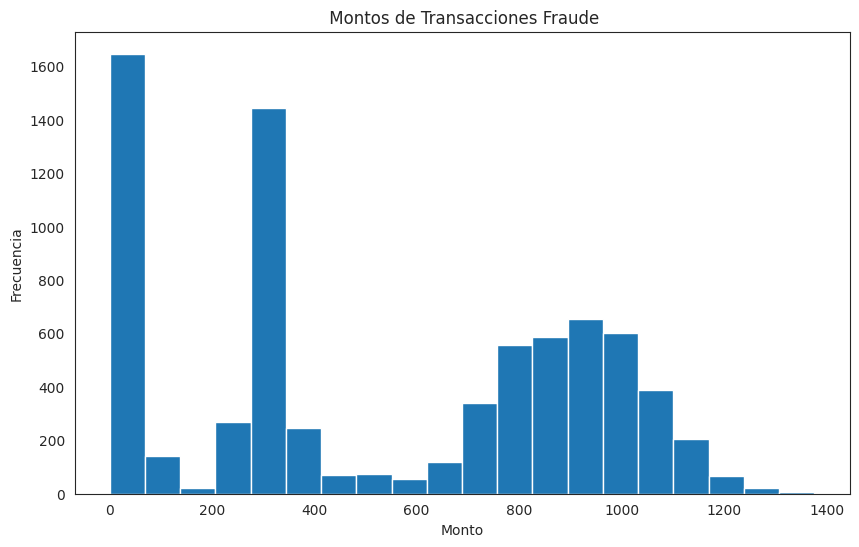

In [ ]:
#Analizamos la variable "monto".
plt.figure(figsize=(10, 6))
plt.hist(transacciones_fraude['amt'], bins=20)
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.title(' Montos de Transacciones Fraude')
plt

**PREGUNTA**: Qué nos indica el histograma? Qué nos sugieren estas distribuciones?

**RTA**.: 1) Observamos un pico Inicial < 50 dolares, que por su alta frecuencia de transacciones  podría sugerir micro-transacciones frecuentes,  para evitar su detección.

2) Observamos un 2do.pico en 300 dolares, podría apuntar a montos medianos que son lo suficientemente valiosos si los multiplicamos por la cantidad de transacciones (300*1500= 450000 dolares, pero no tan altos como para levantar sospechas.

3)Por último una distribución normal entre 600 y 1400 dólares representando transacciones más típicas que intentan pasar desapercibidas en un rango monetario amplio.

<Axes: xlabel='amt'>

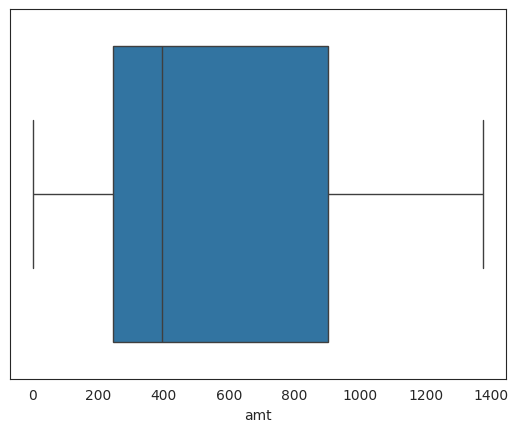

In [ ]:
sns.boxplot(transacciones_fraude,x='amt')

En este gràfico observamos que no hay valores outliers y que el valor mas repetido es 400. Un 25% de transacciones con montos muy bajos menores a 100 dolares, se puede tambièn visualizar en el histograma. un 50% de los montos entre 250 y 900 dolares y otro 25% con montos entre 1000 y 1400 dolares.-

In [ ]:
import warnings
# Ocultar las advertencias
warnings.filterwarnings('ignore')

Comenamos a analizar las edades pero empezamos con el dataset que contiene **fraude y no fraude**, para tener conocimiento del tipo de variable.

Text(0.5, 1.0, 'Distribución de Edades')

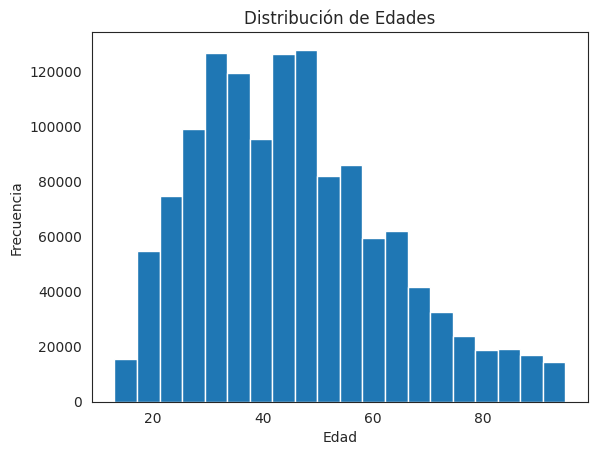

In [ ]:
#La variable tiene una distribuciòn normal.
plt.hist(transacciones_long['age'], bins=20)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades')

La variable edad en el dataset inicial con transacciones fraudes/no fraude  tiene una distribuciòn de frecuencia normal.-

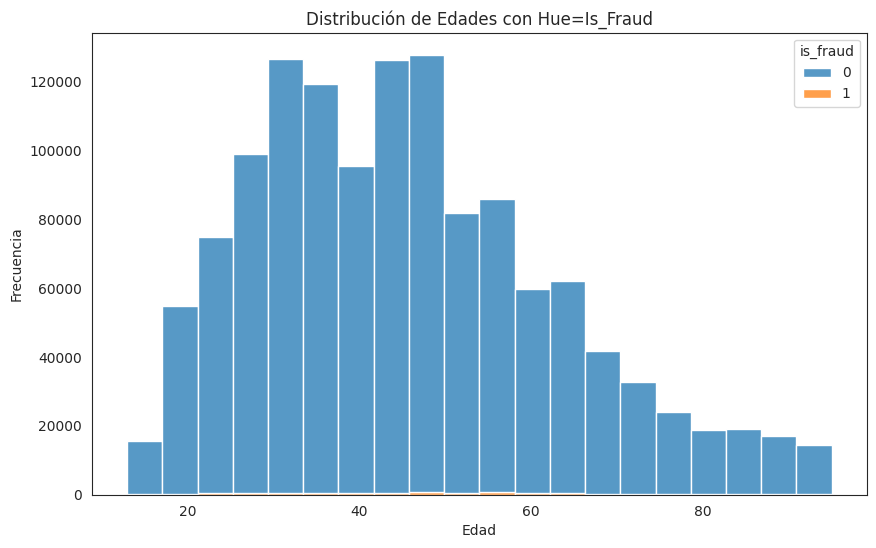

In [ ]:
# Crear el gráfico de histograma con hue=is_fraud.IMPERCEPTIBLES los fraudes, por ello se modificará la representación de los datos.-
plt.figure(figsize=(10, 6))
sns.histplot(data=transacciones_long, x='age', hue='is_fraud', multiple='stack', bins=20)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades con Hue=Is_Fraud')
plt.show()

Continuamos con las edades de **FRAUDE SI**.

**Transacciones Fraude **vs **Edad**

Text(0.5, 1.0, 'Edades de Titulares de Tarjetas Fraude')

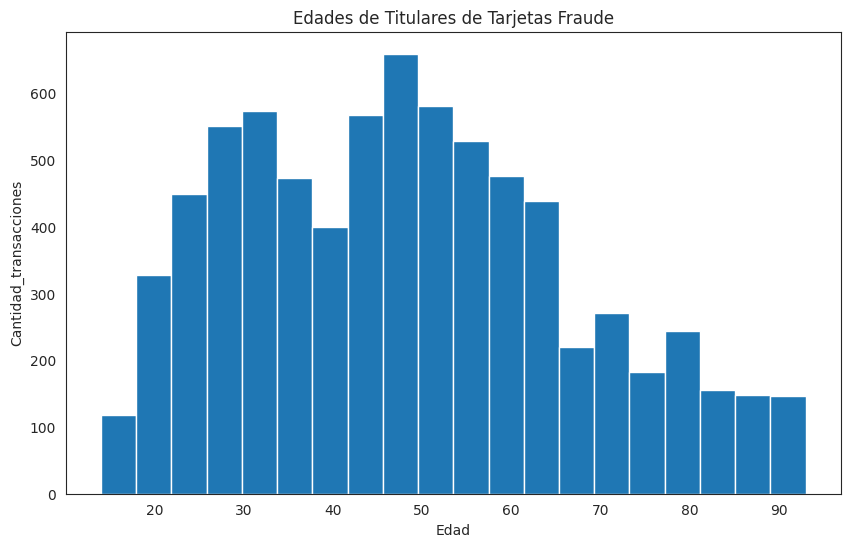

In [ ]:
#Analizamos con histograma la variable edad.
plt.figure(figsize=(10, 6))
plt.hist(transacciones_fraude['age'], bins=20)
plt.xlabel('Edad')
plt.ylabel('Cantidad_transacciones')
plt.title('Edades de Titulares de Tarjetas Fraude')


**PREGUNTA**: Tiene alguna relaciòn relevante la edad de las personas que realizan los fraude?

<Axes: xlabel='age'>

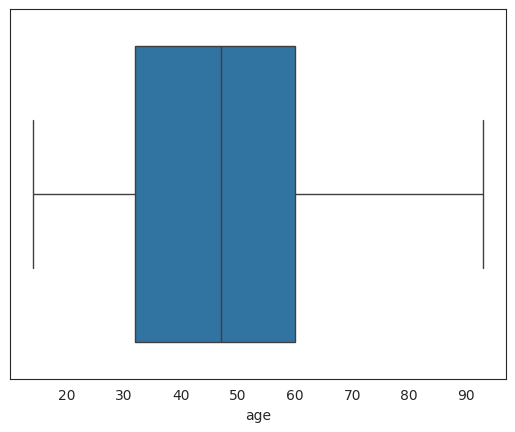

In [ ]:
#Anàlisis univariado de la edad de titulares de tarjetas fraudulentas.
sns.boxplot(transacciones_fraude,x='age')


**RTA**: Un 25% de los titulares tienen menos de 32 años, entre ellos una cantidad menor(120) con 14 años. Asismismo un 25% de titulares con edades de màs de 60 años, entre ellos titulares con edades muy avanzadas como los son mayores de 80 y 90 años es llamativo .- El 50% de titulares con edades entre 30 y 60 años.-

In [ ]:
# Obtener estadísticas de edades
age_estadistica = transacciones_fraude.groupby('cc_num')['age'].aggregate(['min', 'mean', 'max']).reset_index()
# Creamos un DataFrame para age_fraude_cc
age_fraude_cc = pd.DataFrame( )

# Asignar las estadísticas al DataFrame age_fraude_cc
age_fraude_cc['min_age'] = age_estadistica['min']
age_fraude_cc['mean_age'] = age_estadistica['mean']
age_fraude_cc['max_age'] = age_estadistica['max']
age_fraude_cc.describe()

,min_age,mean_age,max_age
count,762.000000,762.000000,762.000000
mean,48.960630,48.963426,48.965879
std,18.690818,18.691453,18.691742
min,14.000000,14.000000,14.000000
25%,34.000000,34.000000,34.000000
50%,48.000000,48.000000,48.000000
75%,61.750000,61.750000,61.750000
max,93.000000,93.000000,93.000000


            age      age_group
Unnamed: 0                    
2449         30  entre 17 y 79
2472         58  entre 17 y 79
2523         58  entre 17 y 79
2546         30  entre 17 y 79
2553         58  entre 17 y 79


Text(0.5, 0, 'Edades')

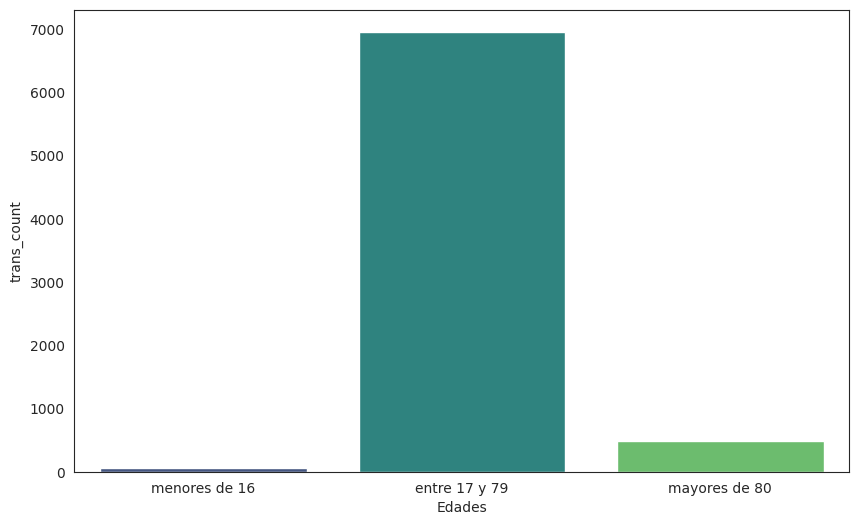

In [ ]:
#Creamos  categorías de edad temporales para visulizar mejor.
temp_transacciones = age_fraude_cc.copy()
transacciones_fraude['age_group'] = pd.cut(transacciones_fraude['age'],
                                           bins=[0, 16, 80, float('inf')],
                                           labels=['menores de 16', 'entre 17 y 79', 'mayores de 80'])
# Verificamos que las categorías se asignaron correctamente.
print(transacciones_fraude[['age', 'age_group']].head())
# Contamos transacciones fraudulentas por grupo de edad.
conteo_por_edad = transacciones_fraude['age_group'].value_counts().reset_index()
conteo_por_edad.columns = ['age_group', 'trans_count']

# Creamos gráfico de barras para las transacciones por grupo de edad.
plt.figure(figsize=(10, 6))
sns.barplot(data=conteo_por_edad, x='age_group', y='trans_count', palette='viridis')
plt.xlabel('Edades')


Podríamos optar por eliminar edades menores a 16 años y mayores de 80 porque no nos significan en cantidad un aporte importante, pero sí lo es por ej. el emisor de esa tarjeta, la ciudad a la cual pertenece y demás metadatos, por tal motivo decidimos **no eliminarlos**.

**PREGUNTA**:Tiene relaciòn la cantidad poblaciòn de las ciudades con los titulares de tarjetas fraudulentas?

**Transacciones fraude** vs **Población**

In [ ]:
# Verificamos los datos únicos en la columna city_pop en transacciones fraude.
print(transacciones_fraude['city_pop'] .unique())

[    885 1595797    1472     145     602   11253   21635     976    1228
  276002     355    1643    2518    5507    2202     277  270712  973849
    3285      73    4729  238602     205    1892    4653      46    1979
    2408   24840  136895    5950     475   31394     344   50835     149
     126    1943   22305 1241364     540 2906700    2749    2368  601723
     922    2060   99475   75903     399    1946      77   10150  248858
     686    4895     254     581     795   16955   52126     198     964
  151022    4299  166081     110  186140   12626     272  198659    1420
  641349    3776    4138     923     397    1213      53  134056    5577
   14783    2916   27020  116155    3764    1089     878      47    1075
    4431     121   67100     568  190178   36784    2691    7297     365
 1526206    1645    3862  673342     520  927396  172247  545147    2661
     302     522   27829    1368     513    1271     140     470   35439
   19880  910148  478404   10085      83  107941   

**RTA**: Se observa una gran variedad de cantidad de habitantes. Desde números de dos dígitos hasta población de millones, pero...

**PREGUNTA**: En qué poblaciones hay mayor probabilidad que se den los fraudes en poblaciones **grandes? medianas? pequeñas?**





Text(0.5, 1.0, 'Poblaciòn de ciudades')

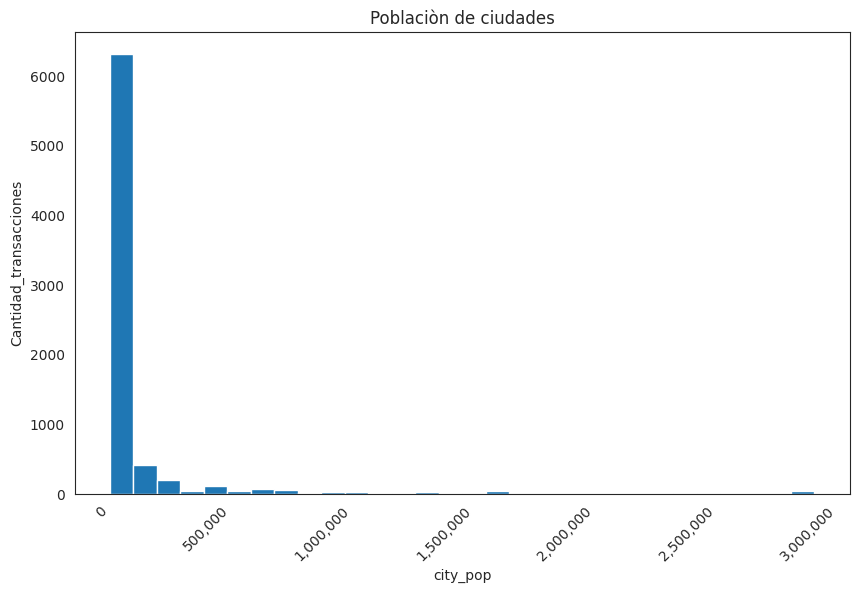

In [ ]:
#Analizamos con histograma la variable cantidad población de las ciudades.
plt.figure(figsize=(10, 6))
plt.hist(transacciones_fraude['city_pop'], bins=30)
# Configurar etiquetas del eje x para mostrar solo números enteros
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('city_pop')
plt.ylabel('Cantidad_transacciones')
plt.title('Poblaciòn de ciudades')


Observamos que **no** **necesariamente** en poblaciones más grandes se efectúan mayores transacciones . Encontramos que en una población pequeña se efectuaron muchas mas transacciones fraudulentas de las que se producen en una ciudad con poblacion mayor.

**RTA**: La mayorìa de las transacciones fraudulentas se efectùan en ciudades pequeñas.-

     city_pop  trans_count
0     2906700           39
1      276002           29
2      190178           29
3         302           29
4      413574           27
..        ...          ...
686    105638            3
687   1312922            2
688     24536            2
689     59744            2
690     71335            2

[691 rows x 2 columns]


Text(0.5, 1.0, 'Transacciones Fraudulentas por Población ')

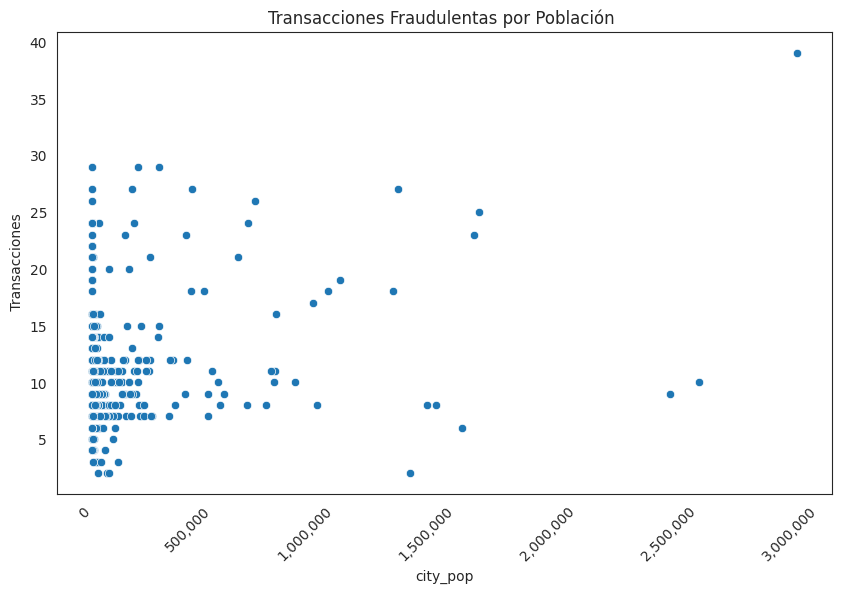

In [ ]:
# Crear el gráfico de dispersión
transacciones_temp = transacciones_fraude['city_pop'].value_counts().reset_index()
transacciones_temp.columns = ['city_pop', 'trans_count']
print(transacciones_temp)


# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transacciones_temp, x='city_pop', y='trans_count')
# Configurar etiquetas del eje x para mostrar solo números enteros
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('city_pop')
plt.ylabel(' Transacciones')
plt.title('Transacciones Fraudulentas por Población ')


Text(0.5, 1.0, ' Población < 100k habitantes')

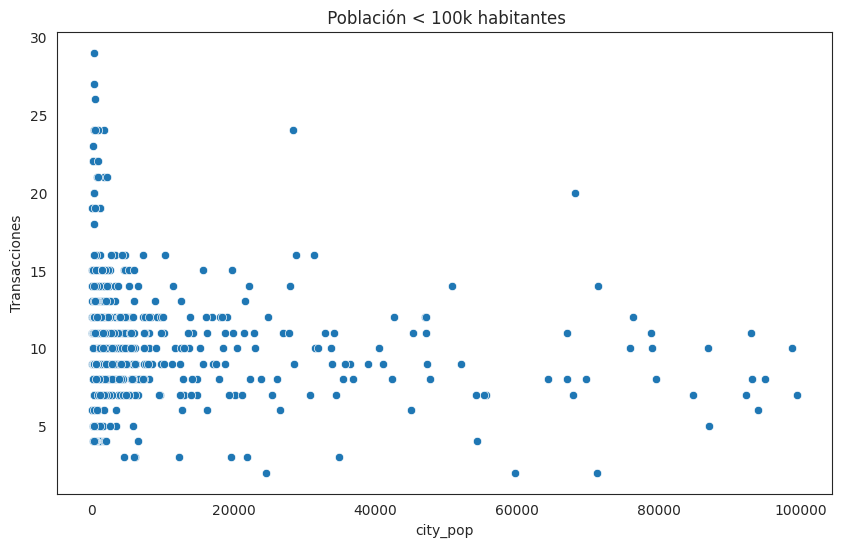

In [ ]:
#Filtramos solo poblaciones menores a 100.000 habitantes.
transacciones_temp = transacciones_temp[transacciones_temp['city_pop'] < 100000]
#Creamos el gráfico de dispersión.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transacciones_temp, x='city_pop', y='trans_count')
plt.xlabel('city_pop')
plt.ylabel('Transacciones')
plt.title(' Población < 100k habitantes')


Ciudades **más** pequeñas, **más** transacciones.

**PREGUNTA**: Se realizan màs transacciones fraudulentas durante los horarios **AM** o **PM**?

In [ ]:
# Contamos las transacciones por AM/PM.
conteo_am_pm = transacciones_fraude['AM_PM'].value_counts().reset_index()
conteo_am_pm.columns = ['AM_PM', 'count']
print(conteo_am_pm)






  AM_PM  count
0    PM   4599
1    AM   2907


**RTA**: Se efectùan màs transacciones en horarios **PM**.

Text(0.5, 1.0, ' Horario de Transacciones Fraudulentas ')

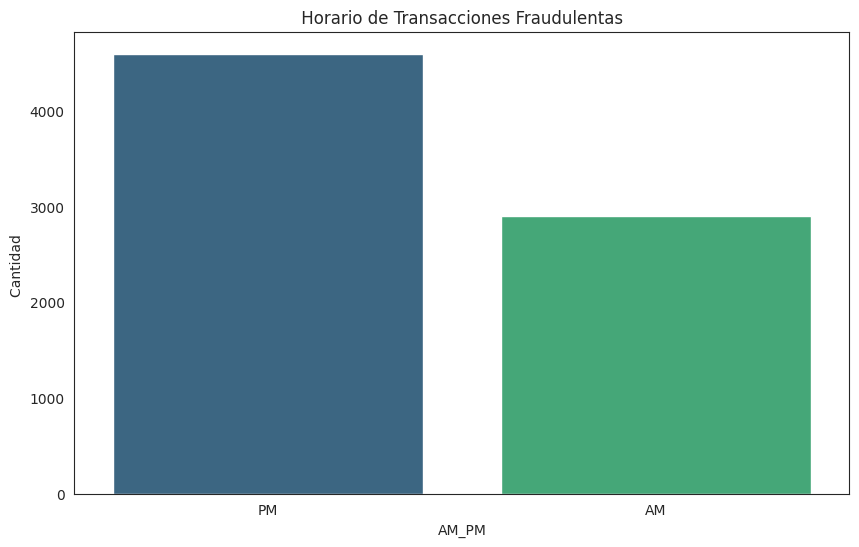

In [ ]:
# Creamos el gráfico de barras para mejor visualizaciòn.
plt.figure(figsize=(10, 6))
sns.barplot(data=conteo_am_pm, x='AM_PM', y='count', palette='viridis')
plt.ylabel('Cantidad ')
plt.title(' Horario de Transacciones Fraudulentas ')

Text(0.5, 1.0, 'Porcentajes Transacciones Fraudulentas  AM/PM')

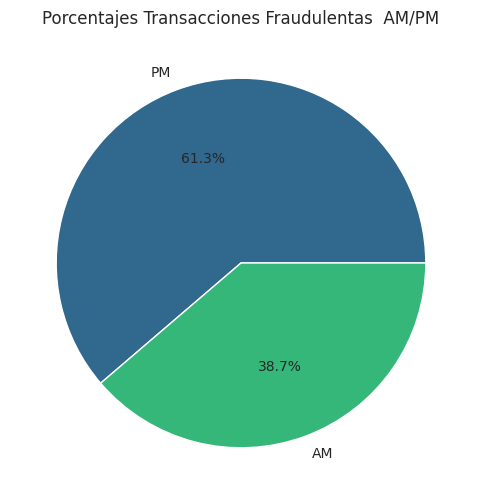

In [ ]:
# Creamos el gráfico de pie para obtener representados porcentajes AM/PM.
plt.figure(figsize=(10, 6))
plt.pie(conteo_am_pm['count'], labels=conteo_am_pm['AM_PM'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(conteo_am_pm)))
plt.title('Porcentajes Transacciones Fraudulentas  AM/PM')


La representaciòn en gràficos de los **porcentajes** 61.3% **PM** / 38.7% **AM**.

**Otros** dataframes para analizar **otros** aspectos.

 **Tarjeta** vs **Categoría**.

In [ ]:
#Agrupamos por nro. tarjeta, categorías y contamos las transcacciones.
transacciones_fraude_categoria = transacciones_fraude.groupby(['cc_num','category'])
transacciones_fraude_categoria['trans_num'].count()




cc_num               category     
60416207185          entertainment    1
                     food_dining      1
                     gas_transport    2
                     home             1
                     kids_pets        1
                                     ..
4980323467523543940  shopping_net     2
                     shopping_pos     2
4992346398065154184  grocery_pos      2
                     shopping_net     4
                     shopping_pos     2
Name: trans_num, Length: 4121, dtype: int64

In [ ]:
categorias=transacciones_fraude["category"].nunique()
print(f"Cantidad de categorías únicas: {categorias}")

Cantidad de categorías únicas: 14


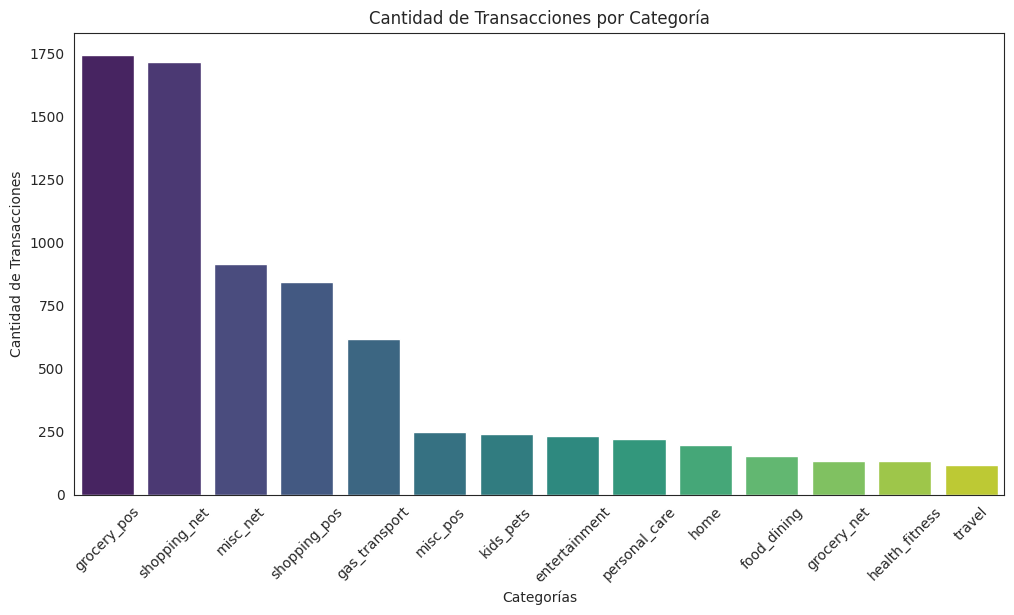

In [ ]:
# Contar la cantidad de transacciones por categoría
conteo_categorias = transacciones_fraude['category'].value_counts().reset_index()
conteo_categorias.columns = ['category', 'count']

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=conteo_categorias, x='category', y='count', palette='viridis')
plt.xlabel('Categorías')
plt.ylabel('Cantidad de Transacciones')
plt.title('Cantidad de Transacciones por Categoría')
plt.xticks(rotation=45)
plt.show()

Podemos inferir que realivamente **varía** de  **categoría** una misma  tarjeta fraudulenta. Es decir que una misma tarjeta efectúa transacciones con **diferentes categorías**.-

JOBs

In [ ]:
#Contamos los jobs unicos -
trabajos=transacciones_fraude["job"].nunique()
print(f"Cantidad de trabajos únicos: {trabajos}")

Cantidad de trabajos únicos: 443


In [ ]:
# Al ser tan diferentes no es factible una reduccion.
trabajos=transacciones_fraude["job"].unique()
print(trabajos)

['Soil scientist' 'Horticultural consultant' 'Public affairs consultant'
 'Administrator, education' 'Cytogeneticist' 'Scientist, biomedical'
 'Geochemist' 'Engineer, automotive' 'Psychotherapist, child'
 'Medical technical officer' 'Financial adviser' 'Financial trader'
 'Event organiser' 'Retail merchandiser' 'Solicitor, Scotland'
 'Glass blower/designer' 'Surveyor, land/geomatics' 'Science writer'
 'Research officer, trade union' 'Product designer' 'Geologist, wellsite'
 'Scientist, research (maths)' 'Engineer, mining' 'Audiological scientist'
 'Nutritional therapist' 'Pilot, airline' 'Surveyor, minerals'
 'Multimedia programmer' 'Sales professional, IT'
 'Agricultural consultant' 'Accounting technician' 'Records manager'
 'Illustrator' 'Hospital doctor' 'Chartered public finance accountant'
 'Environmental consultant' 'Engineer, building services'
 'Marketing executive' 'Restaurant manager, fast food'
 'Television floor manager' 'Comptroller'
 'Research scientist (life sciences)' '

In [ ]:
conteo_trabajos = transacciones_fraude['job'].value_counts().reset_index()
conteo_trabajos.columns = ['trabajo', 'count']
conteo_trabajos


,trabajo,count
0,Materials engineer,62
1,Trading standards officer,56
2,Naval architect,53
3,Exhibition designer,51
4,"Surveyor, land/geomatics",50
...,...,...
438,Statistician,3
439,Health physicist,3
440,Chartered loss adjuster,3
441,English as a second language teacher,2


In [ ]:
top_20_trabajos= conteo_trabajos.sort_values(by='count', ascending=False).head(20)
print(top_20_trabajos)


                                  trabajo  count
0                      Materials engineer     62
1               Trading standards officer     56
2                         Naval architect     53
3                     Exhibition designer     51
4                Surveyor, land/geomatics     50
5                     Mechanical engineer     49
6                          Prison officer     48
7                       Quantity surveyor     48
8                  Audiological scientist     46
9   Senior tax professional/tax inspector     45
10                Copywriter, advertising     45
11                      Film/video editor     44
12                  Scientist, biomedical     44
13                       Financial trader     43
14        Television production assistant     42
17                      Buyer, industrial     41
15                             Podiatrist     41
16                  Private music teacher     41
18                      Nurse, children's     40
19               Mag

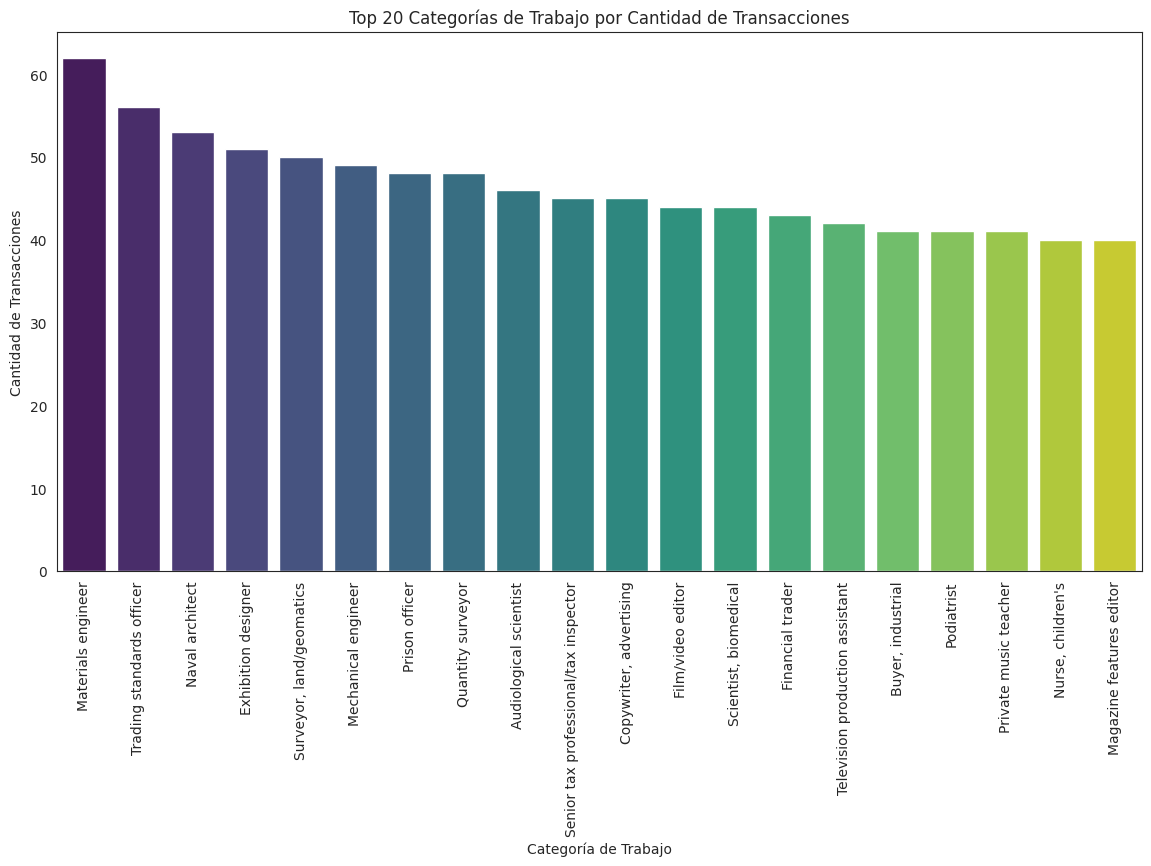

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(14, 7))
sns.barplot(data=top_20_trabajos, x='trabajo', y='count', palette='viridis')
plt.xlabel('Categoría de Trabajo')
plt.ylabel('Cantidad de Transacciones')
plt.title('Top 20 Categorías de Trabajo por Cantidad de Transacciones')
plt.xticks(rotation=90)
plt.show()

**Tarjeta** vs **Comerciante**


In [ ]:
#Caluclamos cantidad de comerciantes únicos.
cantidad_comerciantes=transacciones_fraude['merchant'].nunique()
print(f"Cantidad de comerciantes únicos: {cantidad_comerciantes}")

Cantidad de comerciantes únicos: 679


**Comerciante** vs **Transacciones Fraude**

In [ ]:
#Agrupamos y contamos las transacciones por merchant.
merchant_transacciones = transacciones_fraude.groupby('merchant')['trans_num'].count()
#Ordenamos en forma descendente.
merchant_transacciones_ordenadas = merchant_transacciones.sort_values(ascending=False)
print(merchant_transacciones_ordenadas)

merchant
fraud_Rau and Sons                   49
fraud_Kozey-Boehm                    48
fraud_Cormier LLC                    48
fraud_Doyle Ltd                      47
fraud_Vandervort-Funk                47
                                     ..
fraud_Dicki Ltd                       1
fraud_Kuphal-Toy                      1
fraud_Deckow-Dare                     1
fraud_Dach-Borer                      1
fraud_Reichel, Bradtke and Blanda     1
Name: trans_num, Length: 679, dtype: int64


In [ ]:
#Seleccionamos solo mayores a 20 fraudes por merchant.
merchant_mas_20=merchant_transacciones_ordenadas[merchant_transacciones_ordenadas>20]
print(merchant_mas_20)
merchant_mas_20.count()

merchant
fraud_Rau and Sons                         49
fraud_Kozey-Boehm                          48
fraud_Cormier LLC                          48
fraud_Doyle Ltd                            47
fraud_Vandervort-Funk                      47
                                           ..
fraud_Donnelly PLC                         21
fraud_Sawayn PLC                           21
fraud_Rohan, White and Aufderhar           21
fraud_Bednar Group                         21
fraud_Parisian, Schiller and Altenwerth    21
Name: trans_num, Length: 123, dtype: int64


123

In [ ]:
#Agrupamos por nro.tarjeta, comerciante y contamos transacciones.
transacciones_fraude_merchant = transacciones_fraude.groupby(['cc_num','merchant'])
transacciones_fraude_merchant['trans_num'].count()

cc_num               merchant                           
60416207185          fraud_Barrows PLC                      1
                     fraud_Berge-Hills                      1
                     fraud_Cummings LLC                     1
                     fraud_Douglas-White                    1
                     fraud_Labadie LLC                      1
                                                           ..
4992346398065154184  fraud_Kerluke-Abshire                  1
                     fraud_Kihn, Abernathy and Douglas      1
                     fraud_Kris-Padberg                     1
                     fraud_Rutherford-Mertz                 1
                     fraud_Schmeler, Bashirian and Price    1
Name: trans_num, Length: 7391, dtype: int64

**PREGUNTA**:Varían los "merchant" por tarjeta fraudulenta?

**RTA.**:En esta muestra se verifican transacciones  con **diferentes** **merchants** por  cada tarjeta fraudulenta.

 Pero**...**

**PREGUNTA**: Cuántas veces estafan a **un mismo** merchant con distintas tarjetas?

**RTA**.:Observamos  comerciantes con gran cantidad de  transacciones fraudulentas (49)....

**PREGUNTA**:son engañados realmente tantas veces?  están involucrados en el mecanismo fraudulento?

**UNICA SIN RTA**:Es la única pregunta que no podemos responder atento a que el acto probatorio de un delito no nos corresponde, pero sí podemos marcar alertas en estos casos tan llamativos.-



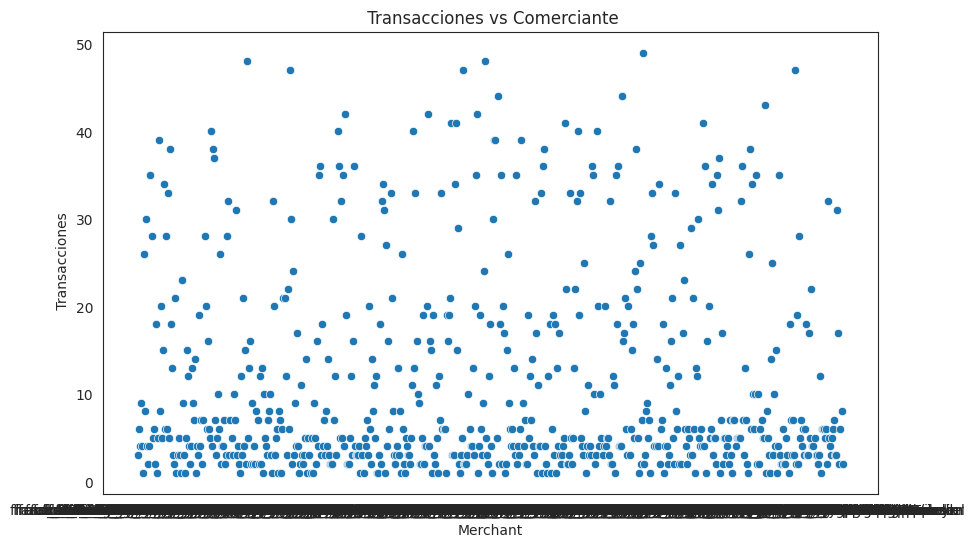

In [ ]:
#Pasamos a dataframe para graficar con scatter.
if isinstance(merchant_transacciones, pd.Series):
    merchant_transacciones = merchant_transacciones.to_frame()
#Creamos el gráfico.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merchant_transacciones, x='merchant', y='trans_num')
plt.xlabel('Merchant')
plt.ylabel(' Transacciones')
plt.title(' Transacciones vs Comerciante')
plt.show()

Finalmente ambos gráficos  (histograma y dispersión) nos muestran una alta concentración en comerciantes con **menos** de 10 **transacciones fraude** y en menor porporción aquellos comerciantes con altas cantidades de transacciones fraude, pero **si sumamos** a todos lo comerciantes con **altas cantidades de fraudes** (> a 10), nos da un número bastante significativo para tener en cuenta a todos ellos al momento de la predicción.

**Tarjetas** vs **Género**

In [ ]:
#Agrupamos por nro tarjeta, por gender, cantidad de transacciones .
transacciones_fraude_gender=transacciones_fraude.groupby(['cc_num',"gender"]) ['trans_num'].count().unstack(fill_value=0)
transacciones_fraude_gender

gender,F,M
cc_num,,
60416207185,9,0
60422928733,0,12
60423098130,0,10
60427851591,0,14
60490596305,10,0
...,...,...
4911818930706644725,0,9
4956828990005111019,0,10
4973530368125489546,10,0


In [ ]:
# Sumamos las columnas 'F' y 'M'
total_fraude_gender= transacciones_fraude_gender.sum()
print(total_fraude_gender)

gender
F    3735
M    3771
dtype: int64


**No hay** predominio de ningún **género** en cuanto a cantidad de transacciones fraudulentas.-


In [ ]:
#Estados únicos  en donde se realizaron transacciones del dataset original.Luego lo compararemos con Estados donde se producen fraudes.
numero_estados_unicos = transacciones_original["state"].nunique()
print(f"El número de estados únicos es: {numero_estados_unicos}")

El número de estados únicos es: 51


In [ ]:
#Contamos cuántas states hay con transacciones fraudulentas.
transacciones_fraude['state'].nunique()

51

**Transacciones Fraude** vs **City**

In [ ]:
#Contamos cuántas cities hay con transacciones fraudulentas.
transacciones_fraude['city'].nunique()

702

Tenemos **702 ciudades** con transacciones fraude.

In [ ]:
#Agrupamos por nro.de tarjeta y ciudad. Realizamos conteo por agrupamiento.
conteo_fraude_city= transacciones_fraude.groupby(['cc_num','city']).size().reset_index(name='count')
print(conteo_fraude_city)

                  cc_num             city  count
0            60416207185    Fort Washakie      9
1            60422928733    North Augusta     12
2            60423098130          Amorita     10
3            60427851591       Burns Flat     14
4            60490596305           Haynes     10
..                   ...              ...    ...
757  4911818930706644725             Mesa      9
758  4956828990005111019        Elizabeth     10
759  4973530368125489546          Winslow     10
760  4980323467523543940  North Haverhill     10
761  4992346398065154184          Mc Nabb      8

[762 rows x 3 columns]


In [ ]:
# Calculamos el promedio de transacciones fraudulentas por tarjeta por ciudad.
promedio_fraude_city = conteo_fraude_city['count'].mean()
promedio_fraude_city

9.850393700787402

Se realizan casi **10** transacciones **por city** fraudulentas perjudicando a 10 merchants (diferentes o no) tan solo en un día, máximo  dos días.

## DATASET 2DO. PROCESAMIENTO. "**transacciones_long**"

In [ ]:
# Extraemos el nombre del día y creamos una nueva columna "day_name".
transacciones_long['day_name'] = transacciones_long['trans_date_trans_time'].dt.day_name()
print(transacciones_long['day_name'])

Unnamed: 0
0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
1296670     Sunday
1296671     Sunday
1296672     Sunday
1296673     Sunday
1296674     Sunday
Name: day_name, Length: 1296675, dtype: object


**Transacciones Fraude**  vs **Days**

In [ ]:
#Veremos los días en donde se producen mayor cantidad de transacciones fraudulentas.
conteo_fraude_day= transacciones_long.groupby('day_name').size().reset_index(name='days_count')
conteo_fraude_day=conteo_fraude_day.sort_values(by='days_count', ascending=False)
print(conteo_fraude_day)

    day_name  days_count
1     Monday      254282
3     Sunday      250579
2   Saturday      200957
5    Tuesday      160227
0     Friday      152272
4   Thursday      147285
6  Wednesday      131073


**MAS** RELACIONES en torno a la variable "**monto**".

Text(0.5, 1.0, 'Relación entre Género y Monto')

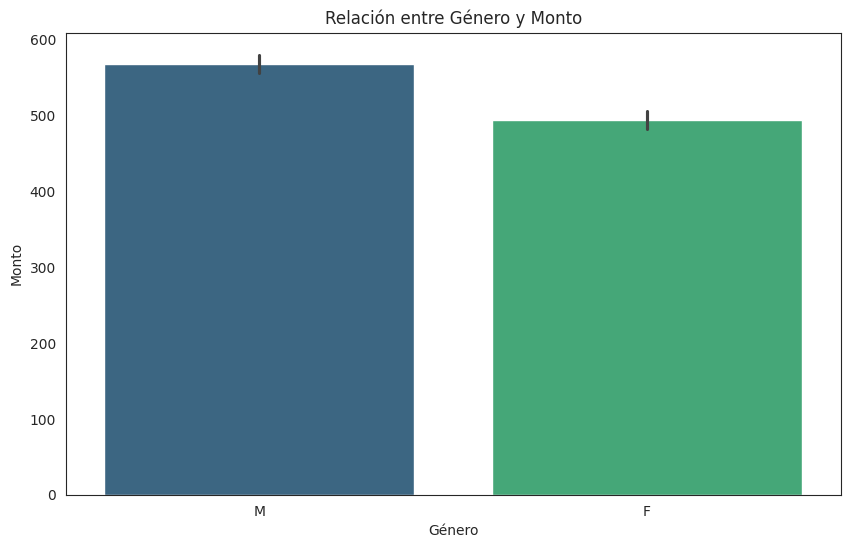

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=transacciones_fraude, x='gender', y='amt', palette='viridis')
plt.xlabel('Género')
plt.ylabel('Monto')
plt.title('Relación entre Género y Monto')

Text(0.5, 1.0, 'Relación entre Monto y Población de la Ciudad')

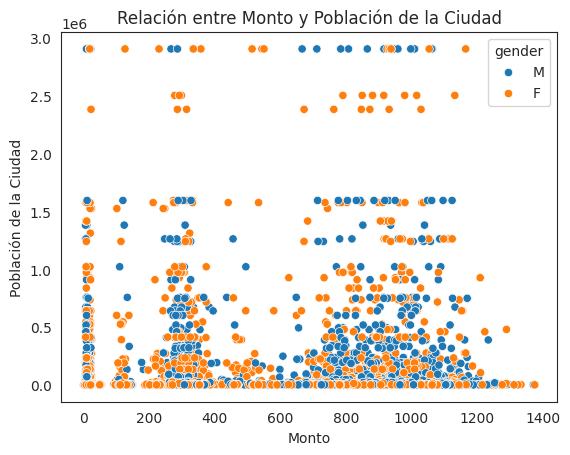

In [ ]:
#Observamos la relacón de monto con la cantidad de población por ciudad y por género.
sns.scatterplot(data=transacciones_fraude, x='amt', y='city_pop', hue='gender')
plt.xlabel('Monto')
plt.ylabel('Población de la Ciudad')
plt.title('Relación entre Monto y Población de la Ciudad')

Se observa concentración en poblaciones de pocos habitantes con algunos  montos variables y otros  en rango de  300 - 400 y 800-110 dolares.

Text(0.5, 1.0, 'Distribución del Monto por Género')

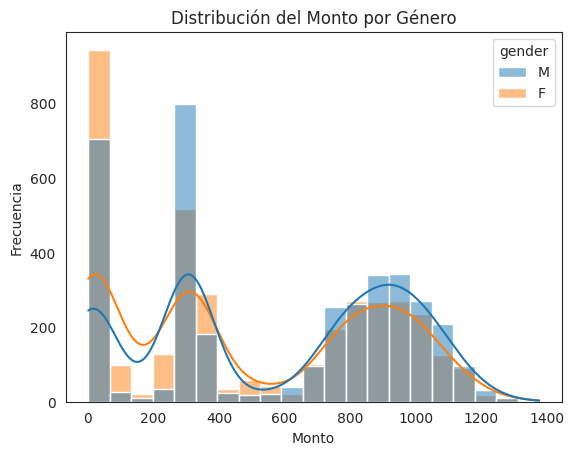

In [ ]:
#En este gráfico visualizamos la distribución de montos por género y una línea de kernel nos marca una estimación de densidad.
sns.histplot(data=transacciones_fraude, x='amt', hue='gender', kde=True)
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.title('Distribución del Monto por Género')

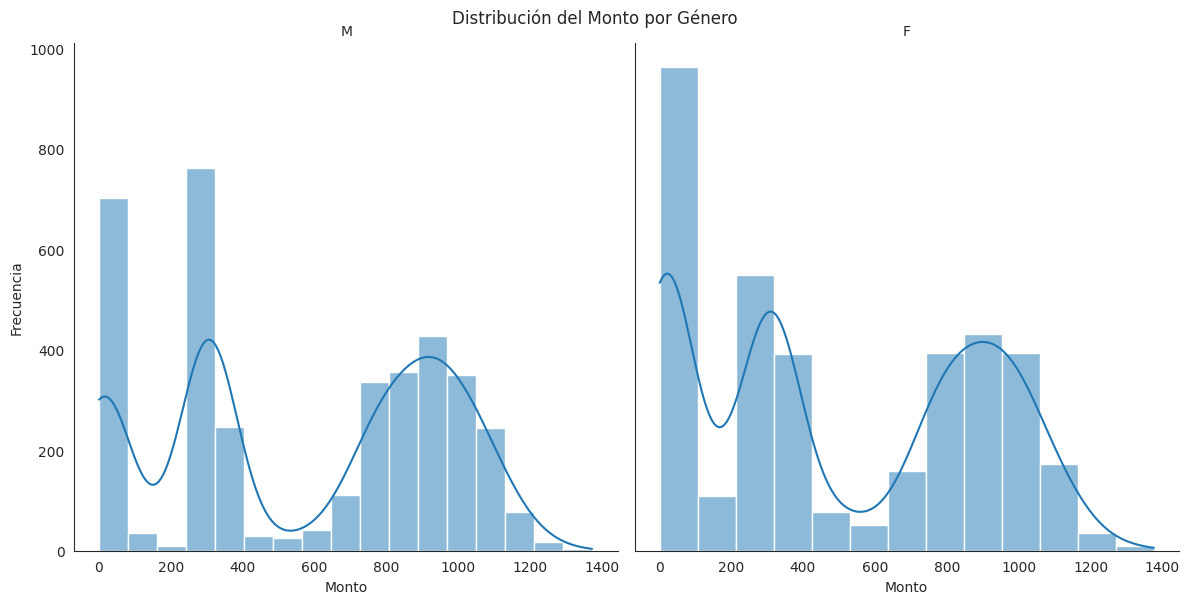

In [ ]:
#En este gráfico visualizamos la relación monto por género por separado.
g = sns.FacetGrid(transacciones_fraude, col='gender', height=6, aspect=1)
g.map(sns.histplot, 'amt', kde=True)

# Ajustar los títulos y etiquetas
g.set_axis_labels('Monto', 'Frecuencia')
g.set_titles(col_template='{col_name}')
plt.suptitle('Distribución del Monto por Género', y=1)
plt.show()


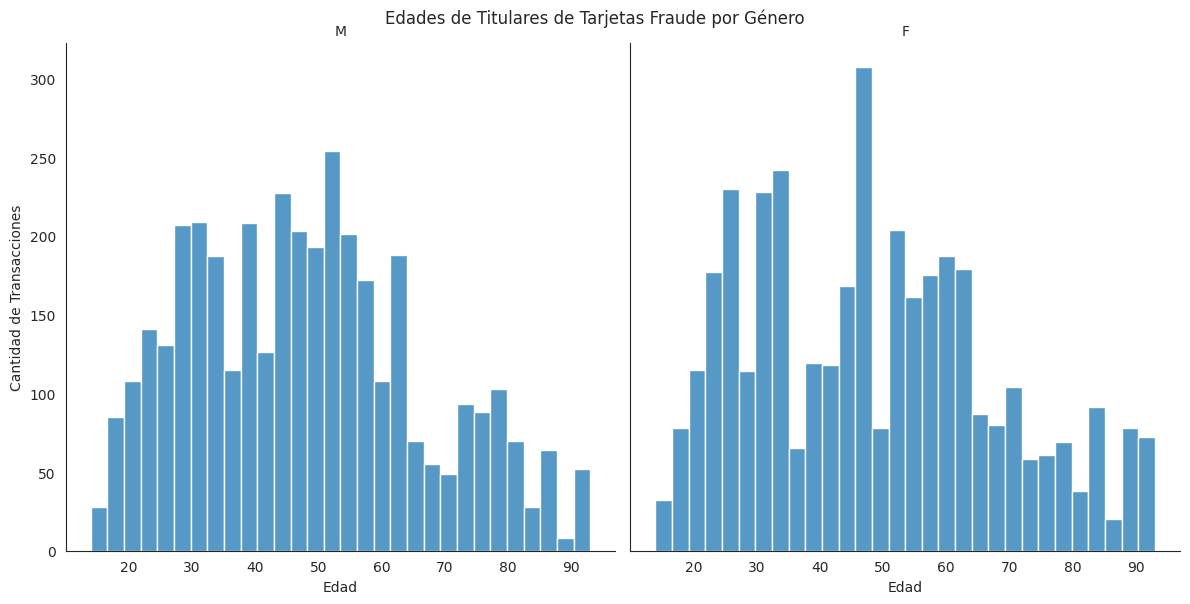

In [ ]:
#En este gráfico visualizamos la relación edades - género por separado.
g = sns.FacetGrid(transacciones_fraude, col='gender', height=6, aspect=1)
g.map(sns.histplot, 'age', bins=30)

# Ajustar los títulos y etiquetas
g.set_axis_labels('Edad', 'Cantidad de Transacciones')
g.set_titles(col_template='{col_name}')
plt.suptitle('Edades de Titulares de Tarjetas Fraude por Género', y=1)
plt.show()


Vamos a trabajar sobre los números de las tarjetas para tratar de identificar **emisores**.

In [ ]:
#Observamos las tarjetas 'unicas de las transacciones totales.
transacciones_long['cc_num']

,cc_num
Unnamed: 0,
0,2703186189652095
1,630423337322
2,38859492057661
3,3534093764340240
4,375534208663984
...,...
1296670,30263540414123
1296671,6011149206456997
1296672,3514865930894695


In [ ]:
# Creamos columna "INN" y extraemos los primeros seis dígitos (IIN)  para tener identificados diferentes emisores.
transacciones_long['IIN'] = transacciones_long['cc_num'].astype(str).str[:6].astype(int)
print(transacciones_long['IIN'])

Unnamed: 0
0          270318
1          630423
2          388594
3          353409
4          375534
            ...  
1296670    302635
1296671    601114
1296672    351486
1296673    272001
1296674    429290
Name: IIN, Length: 1296675, dtype: int64


In [ ]:
# Hacemos merge con columna  'trans_num'para poder incluir en transacciones_fraude la columna IIN recién incorporada.
transacciones_fraude = transacciones_fraude.merge(transacciones_long[['trans_num', 'IIN']], on='trans_num', how='left')
transacciones_fraude.columns



Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'is_fraud', 'trans_date', 'AM_PM', 'age', 'density',
       'age_group', 'IIN'],
      dtype='object')

In [ ]:
#Contamos los INN (emisores)únicos.
transacciones_fraude['IIN'].nunique()

748

 **Transacciones Fraude** vs **Emisores**

In [ ]:
#Contamos transacciones fraudes agrupadas por IIN (emisor).
conteo_fraude_por_IIN = transacciones_fraude.groupby('IIN')['trans_num'].count().reset_index()
# Renombramos la columna
conteo_fraude_por_IIN = conteo_fraude_por_IIN.rename(columns={'trans_num': 'conteo_transacciones_fraude'})
# Ordenamos en forma descendente
conteo_fraude_por_IIN = conteo_fraude_por_IIN.sort_values(by='conteo_transacciones_fraude', ascending=False)
print(conteo_fraude_por_IIN)



        IIN  conteo_transacciones_fraude
197  352959                           28
659  601138                           27
43   213186                           24
658  601136                           23
169  350604                           23
..      ...                          ...
278  357643                            2
488  450310                            2
651  601110                            2
358  400567                            2
374  408909                            2

[748 rows x 2 columns]


In [ ]:
top_20_IIN = conteo_fraude_por_IIN.sort_values(by='conteo_transacciones_fraude', ascending=False).head(20)
print(top_20_IIN)

        IIN  conteo_transacciones_fraude
197  352959                           28
659  601138                           27
43   213186                           24
658  601136                           23
169  350604                           23
16   180067                           21
679  601193                           21
21   180084                           21
652  601114                           19
183  352055                           19
504  459356                           19
421  426012                           18
88   272043                           16
275  357602                           16
179  351866                           16
715  653889                           16
94   300746                           16
574  487400                           16
456  440001                           16
273  357554                           16


El **emisor** de tarjetas fraude que registró  mayor cantidad de transacciones contabilizó unas 28.-

**Transacciones** vs **Emisores** vs **Transacciones Fraude**

In [ ]:
# Agrupamos por 'IIN' y 'cc_num' y contamos las transacciones.
conteo_transacciones_IIN_cc = transacciones_fraude.groupby(['IIN', 'cc_num']).size().reset_index(name='conteo_transacciones')
# Ordenamos de forma descendente por el conteo de transacciones.
conteo_transacciones_IIN_cc = conteo_transacciones_IIN_cc.sort_values(by='conteo_transacciones', ascending=False)
print(conteo_transacciones_IIN_cc)

        IIN               cc_num  conteo_transacciones
513  459356        4593569795412                    19
191  352055     3520550088202337                    19
430  426012        4260128500325                    18
187  351866     3518669219150142                    16
465  440001  4400011257587661852                    16
..      ...                  ...                   ...
383  408909  4089096483689733451                     2
497  450310  4503101193493052864                     2
660  601110     6011109736646996                     2
367  400567     4005676619255478                     2
287  357643     3576431665303017                     2

[762 rows x 3 columns]


Podemos determinar claramente **cuáles** son los  **emisores** con mayor cantidad de emisión de tarjetas con las que efectuarán **fraudes**.-


Nombre de Emisores

352959: Pertenece a JCB (Japan Credit Bureau)1
.

601138: Pertenece a Discover2
.

213186: También pertenece a JCB (Japan Credit Bureau)3
.

350604: No pude encontrar información específica sobre este IIN.

601136: No pude encontrar información específica sobre este IIN.

601193: Pertenece a la tarjeta Discover1
.

180084: Pertenece a la tarjeta JCB2
.

180067: También pertenece a la tarjeta JCB3
.

601114: No encontré información específica sobre este IIN, podría ser un error o un número menos común.

352055: No encontré información específica sobre este IIN, podría ser un error o un número menos común.

459356: Este es un número IIN válido de Visa emitido por Scotiabank Colpatria S.A. en Colombia1
.

426012: Este es un número IIN válido de Visa emitido por HSBC en México2
.

180094: Este es un número IIN válido de JCB emitido por Japan Airlines International (JL) en Japón3
.

487400: Este es un número IIN válido de Visa emitido en los Estados Unidos4
.

355661: Este es un número IIN válido de JCB emitido por JCB International Credit Card Co., Ltd. en Japón5
.

272043: No pude encontrar información específica sobre este número IIN.

357602: Este es un número IIN válido de JCB emitido por JCB International Credit Card Co., Ltd. en Japón6
.

300746: No pude encontrar información específica sobre este número IIN.

222767: No pude encontrar información específica sobre este número IIN.

462945: No pude encontrar información específica sobre este número IIN.


In [ ]:
#Usaremos librerías para geolocalización de transacciones fraude.
import geopandas as gpd
import plotly.express as px

In [ ]:
#Graficamos latitud/longitud de transacciones fraude.
fig = px.scatter_mapbox(transacciones_fraude, lat="lat", lon="long", zoom=9, height=600)
fig.update_layout(mapbox_style="carto-positron")

In [ ]:
#Importamos otra librería para darle más color a la información.
import plotly.express as px

En esta distribución normal de la variable density observamos los puntos de geolocalización con mayor cantidad de transacciones fraude.

In [ ]:
# Creamos el gráfico con tamaño por densidad y colores por densidad.
densidad_color = px.scatter_mapbox(transacciones_fraude,
                        lat="lat",
                        lon="long",
                        size='density',
                        color='density',
                        zoom=9,
                        height=600)

densidad_color.update_layout(mapbox_style="carto-positron")
densidad_color.show()


# CONCLUSIONES EDA e INSIGHTS RESUMEN


Varias  **transacciones fraude** por  tarjeta única resolviendo la hipótesis acerca de si las tarjetas se utilizan solo una vez para cometer fraude.-


Porcentajes 99.42% no fraude vs 0.58% **fraude** ( **7506** ).


Frecuencia de **uso por dia **de las cc fraudulentas: el promedio no supera 1 día, pero  hubo ocasiones de uso  2 o 3 días después.

Grupo **etario** 20-80 con mayor cantidad de transacciones fraude.


Las transacciones fraude se efectúan en **horarios** PM en un 61.3%.


Las **poblaciones** más pequeñas son las elegidas para transacciones fraudulentas con menos de 20.000 habitantes.


En cuanto al **género** de los titulares no es relevante 50%.


En cuanto a  los **días** de la semana, eligen los fines de semana, en mayor proporción.


Podemos identificar n° de **cc únicos** y determinar que han realizado hasta un máximo de 19 transacciones fraude y un mínimo de 2 por cc.


Asimismo podemos identificar **emisores** de tarjetas fraude, algunos de ellos emitieron hasta un máximo de 30 cc y un mínimo de 2 cc fraudulentas.


En todos los **estados** se reportaron transacciones fraude.
   
Sugerimos  :  1)Acotar los grupos etarios para un mayor análisis. 2) Incluir causa de fraude (robo, falsificación) 3) Analizar exhaustivamente nuevas  combinaciones de variables. 4) Establecer un modelo de predicción que detecte en forma casi inmediata las potenciales tarjetas fraude pudiendo ser utilizado al momento de la autorización online.  5) Recolectar mayor información sobre nuevas variables y patrones no detectados aún. 6)Tipo de  SEGURIDAD requerida al momento de la transaccón.

Poder responder is fraud? en forma inmediata es la meta!

## DATASET 3ER. PROCESAMIENTO (REDUCIDO PARA GITHUB). "**transacciones_short**"

Vamos a trabajar con un dataset reducido en forma REPRESENTATIVA, en primer término para poder hostearlo en Github, en segundo término, porque son en proporción, muy pocas las transacciones fraudulentas comparadas con las **NO FRAUDE**, en función de ello decidimos tomar muestras proporcionales en cada estado hasta equiparar con una cantidad **semejante** a las **SI FRAUDE.**

In [ ]:
#Volvemos a filtramos las filas donde is_fraud == 1 (por si hubo cambios).
transacciones_fraude = transacciones_long[transacciones_long['is_fraud'] == 1]


In [ ]:
# Filtramos las filas donde is_fraud == 0 para ir armando muestra reducida
transacciones_no_fraude = transacciones_long[transacciones_long['is_fraud'] == 0]

In [ ]:
# Limitamos el número de filas no fraudulentas a 8000
max_no_fraudulentas = 8000

In [ ]:
#Corroboramos la cantidad de filas fraudulentas, todas formarán parte del nuevo dataset.
num_transacciones_fraude = len(transacciones_fraude)
print("Número de transacciones fraudulentas:", num_transacciones_fraude)

Número de transacciones fraudulentas: 7506


In [ ]:
# Creamos un dataframe vacío para almacenar las transacciones  no fraudulentas
muestra_transacciones_no_fraudulentas= pd.DataFrame()


In [ ]:
# Calculamos el número de transacciones por estado para que no superen las 8000.
num_states = transacciones_no_fraude['state'].nunique()
muestra_por_estado = max_no_fraudulentas // num_states

In [ ]:
#Corroboramos el nro de states únicos de transacciones fraudulentas.
count_states_unicos_fraude=transacciones_fraude["state"].unique()
print(f"El número de estados únicos es: {count_states_unicos_fraude}")

El número de estados únicos es: ['NC' 'TX' 'PA' 'AK' 'MO' 'AR' 'OH' 'VA' 'NY' 'FL' 'SD' 'ME' 'NE' 'AL'
 'CA' 'TN' 'IN' 'IA' 'UT' 'SC' 'MI' 'ND' 'KY' 'WI' 'IL' 'OK' 'DC' 'MN'
 'LA' 'OR' 'WY' 'NM' 'GA' 'KS' 'WV' 'MD' 'NH' 'AZ' 'WA' 'CO' 'NJ' 'MA'
 'DE' 'ID' 'MS' 'CT' 'MT' 'VT' 'NV' 'RI' 'HI']


Advertimos que la **diferencia** entre **States únicos** (51) totales (del dataset long/original) y States únicos **Si Fraudes**,  es cero. Es decir los states únicos han sufrido al menos **una vez** transacciones fraudulentas.-

In [ ]:
# Iteraramos sobre cada state y tomamos una muestra aleatoria de filas no fraudulentas.
for state in transacciones_no_fraude['state'].unique():
    estado_transacciones_no_fraude = transacciones_no_fraude[transacciones_no_fraude['state'] == state]
    muestra_estado_transacciones_no_fraude = estado_transacciones_no_fraude.sample(n=min(muestra_por_estado,len(estado_transacciones_no_fraude)), random_state=42)
    muestra_transacciones_no_fraudulentas = pd.concat([muestra_transacciones_no_fraudulentas,  muestra_estado_transacciones_no_fraude])

In [ ]:
#Controlamos que las rows no superen las 8000.
if len(muestra_transacciones_no_fraudulentas ) >max_no_fraudulentas:
    muestra_transacciones_no_fraudulentas = muestra_transacciones_no_fraudulentas.sample(n=max_no_fraudulentas, random_state=42)

In [ ]:
# Combinamos ambos subconjuntos.
transacciones_short = pd.concat([transacciones_fraude,  muestra_transacciones_no_fraudulentas])
print(transacciones_short.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15506 entries, 2449 to 920853
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  15506 non-null  datetime64[ns]
 1   cc_num                 15506 non-null  int64         
 2   merchant               15506 non-null  object        
 3   category               15506 non-null  object        
 4   amt                    15506 non-null  float64       
 5   gender                 15506 non-null  object        
 6   city                   15506 non-null  object        
 7   state                  15506 non-null  object        
 8   zip                    15506 non-null  int64         
 9   lat                    15506 non-null  float64       
 10  long                   15506 non-null  float64       
 11  city_pop               15506 non-null  int64         
 12  job                    15506 non-null  object        
 13  do

Este es nuestro **nuevo dataset** que formatearemos como csv listo para subir a Github por si fuera requerido.Además es el dataset al cual le aplicaremos el **modelo** de predicción.

In [ ]:
transacciones_short.shape

(15506, 21)

In [ ]:
# Creamos una nueva columna 'density' en función de  la cantidad de transacciones fraude por ciudad.
transacciones_short['density'] = transacciones_short[transacciones_short['is_fraud'] == 1].groupby(['lat', 'long'])['trans_num'].transform('count').fillna(0)
print(transacciones_short[['lat', 'long', 'density']])

                lat     long  density
Unnamed: 0                           
2449        35.9946 -81.7266      8.0
2472        29.4400 -98.4590      7.0
2523        29.4400 -98.4590      7.0
2546        35.9946 -81.7266      8.0
2553        29.4400 -98.4590      7.0
...             ...      ...      ...
889616      41.8383 -71.4377      NaN
66470       41.8383 -71.4377      NaN
280757      41.8383 -71.4377      NaN
1200409     41.8383 -71.4377      NaN
920853      41.8383 -71.4377      NaN

[15506 rows x 3 columns]


In [ ]:
# Llenamos los valores NaN con 0.
transacciones_short['density'] = transacciones_short['density'].fillna(0)
print(transacciones_short[['lat', 'long', 'is_fraud', 'density']].head())


                lat     long  is_fraud  density
Unnamed: 0                                     
2449        35.9946 -81.7266         1      8.0
2472        29.4400 -98.4590         1      7.0
2523        29.4400 -98.4590         1      7.0
2546        35.9946 -81.7266         1      8.0
2553        29.4400 -98.4590         1      7.0


In [ ]:
transacciones_short.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,...,job,dob,trans_num,is_fraud,trans_date,AM_PM,age,day_name,IIN,density
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,M,Collettsville,NC,28611,35.9946,...,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1,2019-01-02,AM,30,Wednesday,461331,8.0
2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,F,San Antonio,TX,78208,29.4400,...,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1,2019-01-02,AM,58,Wednesday,340187,7.0
2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,F,San Antonio,TX,78208,29.4400,...,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1,2019-01-02,AM,58,Wednesday,340187,7.0


Probamos el paso del dataframe a **csv**, de csv a Github y de Github a Colab.

In [ ]:
transacciones_short=pd.DataFrame(transacciones_short)
transacciones_short.to_csv('transacciones_short.csv', index=False)



In [ ]:
#Vemos que el traspaso de github a colab es correcto. Empezaremos a trabajar este dataset para los modelos.
transacciones_modelo=pd.read_csv('https://raw.githubusercontent.com/Gimena2024/transacciones_short/refs/heads/main/transacciones_short.csv')
transacciones_modelo


,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,...,job,dob,trans_num,is_fraud,trans_date,AM_PM,age,day_name,IIN,density
0,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,M,Collettsville,NC,28611,35.9946,...,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1,2019-01-02,AM,30,Wednesday,461331,8.0
1,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,F,San Antonio,TX,78208,29.4400,...,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1,2019-01-02,AM,58,Wednesday,340187,7.0
2,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,F,San Antonio,TX,78208,29.4400,...,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1,2019-01-02,AM,58,Wednesday,340187,7.0
3,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,M,Collettsville,NC,28611,35.9946,...,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1,2019-01-02,AM,30,Wednesday,461331,8.0
4,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,F,San Antonio,TX,78208,29.4400,...,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1,2019-01-02,AM,58,Wednesday,340187,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15501,2019-12-23 21:00:45,4633065159406313,fraud_Bahringer Group,health_fitness,93.56,F,Providence,RI,2908,41.8383,...,"Nurse, children's",1995-11-29,a037b465e4488b12b2e215231a9038bd,0,2019-12-23,PM,24,Monday,463306,0.0
15502,2019-02-09 08:23:11,4633065159406313,fraud_Bernhard Inc,gas_transport,43.82,F,Providence,RI,2908,41.8383,...,"Nurse, children's",1995-11-29,5078a3bfd06817875cbf3bdb9195c77e,0,2019-02-09,AM,23,Saturday,463306,0.0
15503,2019-05-18 23:00:16,4633065159406313,fraud_Rutherford-Mertz,grocery_pos,70.76,F,Providence,RI,2908,41.8383,...,"Nurse, children's",1995-11-29,4a8cd67cd0ce49d66bdef0960b3f4e52,0,2019-05-18,PM,23,Saturday,463306,0.0
15504,2020-05-17 05:12:34,4633065159406313,fraud_Ledner-Pfannerstill,gas_transport,66.99,F,Providence,RI,2908,41.8383,...,"Nurse, children's",1995-11-29,7cd2d1d0e9ab3d81ccfb96f3d046c8ed,0,2020-05-17,AM,24,Sunday,463306,0.0


In [ ]:
#Utilizamos e importamos esta librería para codificar variables categóricas.
from sklearn.preprocessing import LabelEncoder



In [ ]:
le = LabelEncoder()

In [ ]:
# Transformamos con Encoder la columna de estados.
transacciones_modelo['state_encoded'] = le.fit_transform(transacciones_modelo['state'])
 # Mostrar los primeros resultados para ver cómo quedaron los códigos
print(transacciones_modelo[['state', 'state_encoded']].head())

  state  state_encoded
0    NC             27
1    TX             43
2    TX             43
3    NC             27
4    TX             43


In [ ]:
# Transformamos con Encoder la columna de category.
transacciones_modelo['category_encoded'] = le.fit_transform(transacciones_modelo['category'])
 # Mostrar los primeros resultados para ver cómo quedaron los códigos
print(transacciones_modelo[['category', 'category_encoded']].head())

        category  category_encoded
0    grocery_pos                 4
1  gas_transport                 2
2    grocery_pos                 4
3  gas_transport                 2
4    grocery_pos                 4


In [ ]:
#Convertimos días en números porque one hot encoding tira true false.
mapeo_dias = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

transacciones_modelo['day_name'] = transacciones_modelo['day_name'].map(mapeo_dias)


In [ ]:
transacciones_modelo.drop(columns=["trans_date_trans_time","cc_num","dob","trans_num","trans_date","merchant","category","city","state","job" ],inplace=True)


In [ ]:
# Transformamos la columna AM_PM a números.
transacciones_modelo['AM_PM'] = transacciones_modelo['AM_PM'].map({'AM': 0, 'PM': 1})

In [ ]:
# Transformamos la columna gender a números.
transacciones_modelo['gender'] = transacciones_modelo['gender'].map({'M': 0, 'F': 1})

 DATASETS FINALES"transacciones_modelo", "transacciones_estandarizadas".

In [ ]:
transacciones_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15506 entries, 0 to 15505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   amt               15506 non-null  float64
 1   gender            15506 non-null  int64  
 2   zip               15506 non-null  int64  
 3   lat               15506 non-null  float64
 4   long              15506 non-null  float64
 5   city_pop          15506 non-null  int64  
 6   is_fraud          15506 non-null  int64  
 7   AM_PM             15506 non-null  int64  
 8   age               15506 non-null  int64  
 9   day_name          15506 non-null  int64  
 10  IIN               15506 non-null  int64  
 11  density           15506 non-null  float64
 12  state_encoded     15506 non-null  int64  
 13  category_encoded  15506 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 1.7 MB


In [ ]:
transacciones_modelo.head()

,amt,gender,zip,lat,long,city_pop,is_fraud,AM_PM,age,day_name,IIN,density,state_encoded,category_encoded
0,281.06,0,28611,35.9946,-81.7266,885,1,0,30,2,461331,8.0,27,4
1,11.52,1,78208,29.4400,-98.4590,1595797,1,0,58,2,340187,7.0,43,2
2,276.31,1,78208,29.4400,-98.4590,1595797,1,0,58,2,340187,7.0,43,4
3,7.03,0,28611,35.9946,-81.7266,885,1,0,30,2,461331,8.0,27,2
4,275.73,1,78208,29.4400,-98.4590,1595797,1,0,58,2,340187,7.0,43,4


Utilizamos Pairplot  para visualizar las relaciones entre múltiples variables en un DataFrame y Heatmap  para mostrarla  en forma de  tabla de correlación.

In [ ]:
matriz_corr= transacciones_modelo.corr()
matriz_corr

,amt,gender,zip,lat,long,city_pop,is_fraud,AM_PM,age,day_name,IIN,density,state_encoded,category_encoded
amt,1.000000,-0.068188,-0.040081,-0.045190,0.083248,0.034778,0.629778,0.178134,0.081736,0.016672,0.021300,0.582191,0.035641,0.438113
gender,-0.068188,1.000000,0.021200,-0.079892,0.015987,0.036976,-0.032770,-0.003031,-0.034586,0.000876,0.050745,-0.012245,0.041126,0.007545
zip,-0.040081,0.021200,1.000000,-0.012719,-0.879343,0.080206,-0.048851,-0.013627,0.054231,-0.019879,0.012067,-0.052177,-0.130850,-0.021799
lat,-0.045190,-0.079892,-0.012719,1.000000,-0.143446,-0.151328,-0.074730,0.010987,0.079250,-0.009769,-0.033867,-0.051360,0.142331,-0.028055
long,0.083248,0.015987,-0.879343,-0.143446,1.000000,-0.030223,0.118438,0.020033,-0.078989,0.020159,-0.003711,0.112025,0.178446,0.038918
city_pop,0.034778,0.036976,0.080206,-0.151328,-0.030223,1.000000,0.034186,-0.011578,-0.080740,0.019121,0.005712,0.012679,-0.052299,0.009451
is_fraud,0.629778,-0.032770,-0.048851,-0.074730,0.118438,0.034186,1.000000,-0.005049,0.091345,0.014477,0.013075,0.929089,0.057297,0.142700
AM_PM,0.178134,-0.003031,-0.013627,0.010987,0.020033,-0.011578,-0.005049,1.000000,-0.045616,0.007177,0.009460,-0.010577,0.024199,0.340337
age,0.081736,-0.034586,0.054231,0.079250,-0.078989,-0.080740,0.091345,-0.045616,1.000000,0.006675,-0.021332,0.038306,-0.080398,-0.003606
day_name,0.016672,0.000876,-0.019879,-0.009769,0.020159,0.019121,0.014477,0.007177,0.006675,1.000000,0.024749,0.018522,0.013813,0.010231


Text(0.5, 1.0, 'Matriz de Correlación')

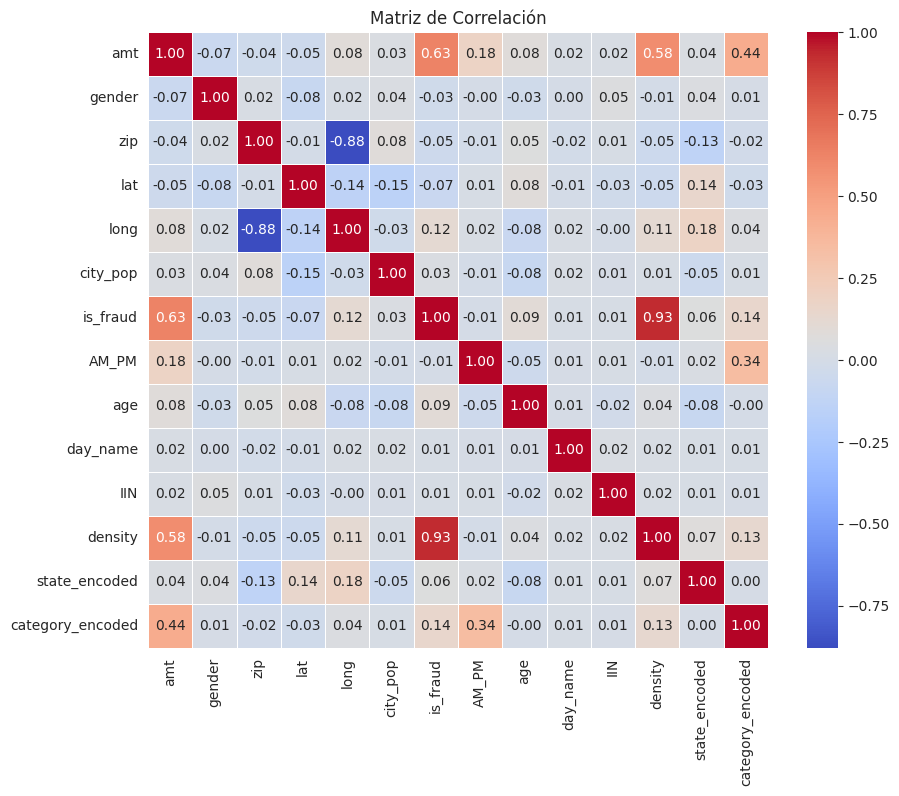

In [ ]:
#Creamos el mapa de calor.
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')

#INGENIERIA DE ATRIBUTOS Y NORMALIZACION/ESTANDARIZACION DE VARIABLES.

Utilizaremos **librerías** que nos permitan **seleccionar** y **transformar** de una manera eficiente las variables.-




In [ ]:
# Antes de estandarizar separamos la variable is fraud para que continue con 0, 1.
X = transacciones_modelo.drop('is_fraud', axis=1)


In [ ]:
y = transacciones_modelo['is_fraud'].values
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
# Utilizamos esta librerìa para estandarizar los valores de las variables.
from sklearn.preprocessing import StandardScaler

In [ ]:
# Creamos el escalador
escala = StandardScaler()
#Escalamos, estandarizamos los datos.
X_escalado = escala.fit_transform(X)
# Convertimos  a DataFrame
transacciones_estandarizadas= pd.DataFrame(X_escalado, columns=X.columns)
transacciones_estandarizadas.head()

,amt,gender,zip,lat,long,city_pop,AM_PM,age,day_name,IIN,density,state_encoded,category_encoded
0,-0.030358,-1.029455,-0.725458,-0.530026,0.590406,-0.311894,-1.26454,-0.903265,-0.508013,0.409113,0.459850,0.059005,-0.691176
1,-0.763316,0.971388,0.997814,-1.642205,-0.366067,5.432701,-1.26454,0.623955,-0.508013,-0.615715,0.289875,1.162661,-1.204953
2,-0.043275,0.971388,0.997814,-1.642205,-0.366067,5.432701,-1.26454,0.623955,-0.508013,-0.615715,0.289875,1.162661,-0.691176
3,-0.775526,-1.029455,-0.725458,-0.530026,0.590406,-0.311894,-1.26454,-0.903265,-0.508013,0.409113,0.459850,0.059005,-1.204953
4,-0.044852,0.971388,0.997814,-1.642205,-0.366067,5.432701,-1.26454,0.623955,-0.508013,-0.615715,0.289875,1.162661,-0.691176


In [ ]:
# Convertir y a un DataFrame de pandas
y= pd.DataFrame(y, columns=['is_fraud'])

In [ ]:
# Agregamos  la columna 'is_fraud' que fue borrada para que no sea estandarizada en sus valores.
transacciones_estandarizadas = pd.concat([transacciones_estandarizadas, y.reset_index(drop=True)], axis=1)
 # Verificar que la columna 'is_fraud' esté presente
print(transacciones_estandarizadas['is_fraud'])

0        1
1        1
2        1
3        1
4        1
        ..
15501    0
15502    0
15503    0
15504    0
15505    0
Name: is_fraud, Length: 15506, dtype: int64


#MODELOS de MACHINE LEARNING (clasificaciòn)


 Entrenaremos y testearemos modelos de Machine Learning **Supervisado** de tipo **Clasificación** para predecir la variable "is_fraud".


Comenzamos por aplicar  **PCA** sobre todas las **variables** utilizadas con el fin de determinar el peso relativo de cada variable en los modelos y utilizar las más convenientes.-



Determinaremos si algun modelo presenta over o under fitting relacionando el trade-off entre bias y variance.




**Optimización**: Utilizar alguna técnica de optimización de hiperparámetros (**gridsearch**, randomizedsearch)


In [ ]:
#Seleccionamos librerìas para separar train / test y mètricas.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
X = transacciones_estandarizadas[['amt', 'gender', 'zip','lat','long','city_pop','AM_PM','age','day_name','IIN','density','state_encoded','category_encoded']]
y = transacciones_estandarizadas['is_fraud']

In [ ]:
#Separamos el dataset en train y test.
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [ ]:
#Importamos  el modelo para pca.
from sklearn.decomposition import PCA
#Importamos  el modelo para RandomForestClassifier.
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Instanciamos PCA y ajustamos solo  con los datos de entrenamiento con  10 componentes principales.
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
# Transformamod los datos de test usando el mismo PCA.
X_test_pca = pca.transform(X_test)

In [ ]:
#Verificamos el resultado de la selección de variables.
varianza_explicada = pca.explained_variance_ratio_
print("Explained Variance Ratio:", varianza_explicada)


Explained Variance Ratio: [0.15850954 0.13734659 0.09924921 0.0919532  0.08259175 0.07847153
 0.07581138 0.07283935 0.06588053 0.05670552]


In [ ]:
# Calcular la suma de la varianza explicada
total_varianza_explicada = varianza_explicada.sum()
print("Total Varianza explicada:", total_varianza_explicada)


Total Varianza explicada: 0.9193585974629906


El **resultado** obtenido representa la proporción de la varianza total (o varianza explicada o cantidad de información capturada )que es explicada por cada uno de los 10 componentes principales después de aplicar PCA. En este  caso, los primeros diez componentes explican el **91.87%** de la varianza total, lo que significa que estamos capturando la mayor parte de la información con estos diez componentes.

Utilizamos   **Randomized Search** (Grid Search requirió mayor tiempo en su ejecución) para  el proceso de búsqueda de hiperparámetros.


In [ ]:
#Importamos esta librería para seleccionar los hiperparámetros para mejorar el modelo.Optimización.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
# UNO ajustamos parámetros y  entrenamos el modelo para RandomForestClassifier.
random_forest_classifier = RandomForestClassifier()




In [ ]:
param_dist = { 'n_estimators': randint(50, 150),

               'max_depth': [10, 15, 20],

               'min_samples_split': randint(2, 6),

               'min_samples_leaf': randint(1, 4),

               'bootstrap': [True]
               }


In [ ]:
# UNO B Modelo tradicional.
random_forest_classifier.fit(X_train_pca, y_train)

RandomForestClassifier()

In [ ]:
#Determinamos el data set para randomized.
randomized_hp = RandomizedSearchCV(random_forest_classifier, param_dist, scoring="accuracy", n_jobs=-1, cv=3)


In [ ]:
#Entrenamos el modelo a los datos para selección de hiperparámetros.
randomized_hp.fit(X_train_pca, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 15, 20],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ef049bb18a0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ef049bb0d00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ef049bb2350>},
                   scoring='accuracy')

In [ ]:
# Obtenemos los mejores parámetros y el mejor score.
best_params = randomized_hp.best_params_
best_score = randomized_hp.best_score_
print("Mejores Parámetros:", best_params)
print("Mejor Score:", best_score)

Mejores Parámetros: {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 103}
Mejor Score: 0.9810817262752587


**Determinamos** que con esta selección de **hiperparámetros** podemos entrenar el mismo modelo de random forest "UNO B".

In [ ]:
#UNO A  Modelo con hiperparámetros seleccionados.
random_forest_classifier_hp= RandomForestClassifier(**best_params)
random_forest_classifier_hp.fit(X_train_pca, y_train)


RandomForestClassifier(max_depth=15, min_samples_split=4, n_estimators=103)

In [ ]:
#Importamos el modelo para regresiòn logìstica.
from sklearn.linear_model import LogisticRegression

In [ ]:
# DOS instanciamos  y entrenamos regresiòn logìstica.
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_pca, y_train)

LogisticRegression()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [ ]:
# TRES instanciamos modelo knn con distintos vecinos cercanos.
modelo3_knn=knn(3)

In [ ]:
modelo3_knn.fit(X_train_pca,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#CUATRO
modelo5_knn=knn(5)

In [ ]:
modelo5_knn.fit(X_train_pca,y_train)

KNeighborsClassifier()

In [ ]:
# CINCO
modelo7_knn=knn(7)

In [ ]:
modelo7_knn.fit(X_train_pca,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
!pip install xgboost

In [ ]:
#Importamos el modelo para xgboost.
import xgboost as xgb

In [ ]:
# SEIS  instanciamos XGBOOST
modelo_Xgb = xgb.XGBClassifier()


In [ ]:
 #Entrenamos el modelo
 modelo_Xgb.fit(X_train_pca,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#CROSS-VALIDATION (VALIDACION CRUZADA).


Evaluamos los modelos con esta **técnica**  para obtener una estimación fiable (promedio) de sus rendimientos a los fines de prevenir el sobreajuste y asegurar que el modelo elegido generalice bien a datos no vistos.








In [ ]:
#Importamos libreria cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
#UNO B
cross_val_score(random_forest_classifier,X_train,y_train,cv=5).mean()

1.0

In [ ]:
#UNO A
cross_val_score(random_forest_classifier_hp,X_train,y_train,cv=5).mean()


1.0

In [ ]:
#DOS
cross_val_score(logistic_regression,X_train,y_train,cv=5).mean()

0.9987961427158165

In [ ]:
#TRES
cross_val_score(modelo3_knn,X_train,y_train,cv=5).mean()

0.9850373616619976

In [ ]:
#CUATRO
cross_val_score(modelo5_knn,X_train,y_train,cv=5).mean()

0.9825435886056638

In [ ]:
#CINCO
cross_val_score(modelo7_knn,X_train,y_train,cv=5).mean().mean()

0.982457678048059

In [ ]:
#SEIS
cross_val_score(modelo_Xgb,X_train,y_train,cv=5).mean()

1.0

Aplicando  cross_val_score a los modelos RandomForest tradicional, RandomForest con hiperparámetros seleccionados y XGBoost,  nos dan un promedio perfecto (1), razón por la cual los descartamos a los fines de evitar Overfitting (sobreajuste).-

El modelo elegido "Regresión Logística" por mejor promedio de entrenamiento.- Ahora procedemos a predecir resultados y medir  efectividad en todos los modelos(aunque solo bastaría con el seleccionado) a modo explicativo nada más.

In [ ]:
#Importamos librería para evaluar las métricas de los modelos.
from sklearn.metrics import accuracy_score

In [ ]:
# UNO A Predicción en el conjunto de entrenamiento y prueba
y_train_pred = random_forest_classifier_hp.predict(X_train_pca)
y_test_pred = random_forest_classifier_hp.predict(X_test_pca)
# Calcular la precisión
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.9996560323329607
Test Accuracy: 0.9832344596337375


In [ ]:
# UNO B  Predicción en el conjunto de entrenamiento y prueba
y_train_pred = random_forest_classifier.predict(X_train_pca)
y_test_pred = random_forest_classifier.predict(X_test_pca)
# Calcular la precisión
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 1.0
Test Accuracy: 0.9816868712922363


In [ ]:
# DOS  Predicción en el conjunto de entrenamiento y prueba
y_train_pred = logistic_regression.predict(X_train_pca)
y_test_pred = logistic_regression.predict(X_test_pca)
# Calcular la precisión
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.9858973256513888
Test Accuracy: 0.9819448026824864


In [ ]:
# TRES Predicción en el conjunto de entrenamiento y prueba
y_train_pred = modelo3_knn.predict(X_train_pca)
y_test_pred = modelo3_knn.predict(X_test_pca)
# Calcular la precisión
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.9886490669877032
Test Accuracy: 0.9744647923652309


In [ ]:
# SEIS Predicción en el conjunto de entrenamiento y prueba
y_train_pred = modelo_Xgb.predict(X_train_pca)
y_test_pred = modelo_Xgb.predict(X_test_pca)
# Calcular la precisión
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 1.0
Test Accuracy: 0.985297910755739


In [ ]:
#Reiteramos la prueba con regresión logística.
y_train_pred = logistic_regression.predict(X_train_pca)
y_test_pred = logistic_regression.predict(X_test_pca)

#Métricas (Accuracy_score)

Evaluamos el rendimiento del modelo mediante  aplicación del método Precisión/Accuracy (para clasificación) la cual mide la proporción de predicciones correctas.

Test Accuracy: 98.29%








In [ ]:
#Importamos librerias para terminar con el análisis de métricas.
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, auc,ConfusionMatrixDisplay




Para **reforzar** la selección del modelo 'optimo' utilizaremos  más métricas apropiadas  (**ROC AUC**)

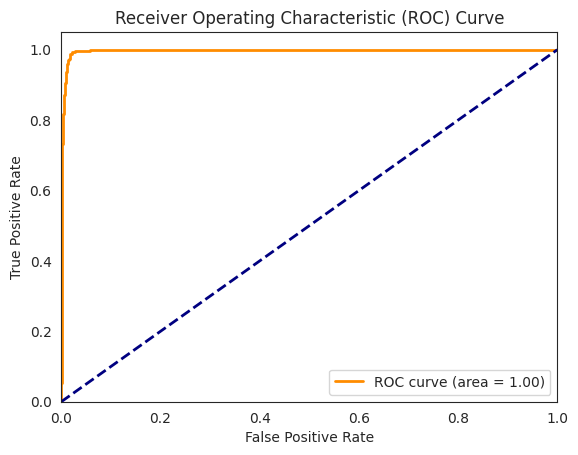

In [ ]:
# Obtenemos las probabilidades de predicción para el conjunto de prueba.
y_test_prob = logistic_regression.predict_proba(X_test_pca)[:, 1]
# Calculamos la curva ROC y el valor AUC.
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)
# Graficamos la curva ROC.
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#Métricas ROC AUC

ROC AUC (Receiver Operating Characteristic Area Under the Curve) se utiliza para evaluar el rendimiento de los modelos de clasificación binaria como es nuestro caso.


ROC Curve es una curva que representa la relación entre la Tasa de Verdaderos Positivos (True Positive Rate) y la Tasa de Falsos Positivos (False Positive Rate) .

AUC (Area Under the Curve): El área bajo la curva ROC.

Valores entre 0 y 1.


#Otras métricas Recall y Precision_score.

En Detección de Fraude es crucial identificar todas las transacciones fraudulentas, por lo que se busca un alto recall (sensibilidad) . Entre 0 y 1.

In [ ]:
#Métrica de evaluación utilizada para  identificar  todas las instancias positivas predictivas del modelo.
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall}')

Recall: 0.9804560260586319


In [ ]:
# Utilizamos otra funcion  "precision_score"  para evaluar modelo en contexto donde es importante reducir los falsos positivos.
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision}')

Precision: 0.9815217391304348


#Matriz de confusión.

Técnica de evaluación utilizada para describir el rendimiento de un modelo de clasificación.

Detección de Problemas: Te ayuda a identificar si hay clases específicas donde el modelo tiene problemas para predecir correctamente Verdadero positivos,negativos; Falsos positivos, negativos..



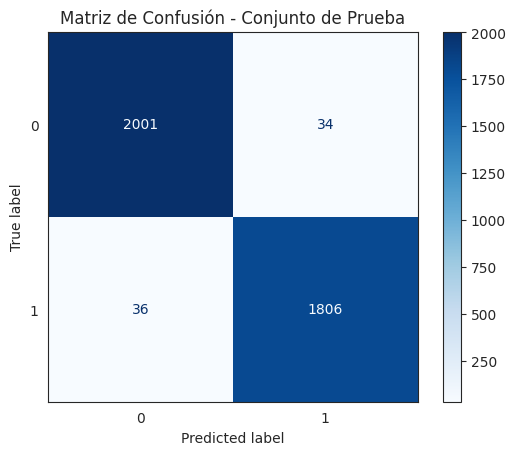

In [ ]:
# Calculamos y mostramos la matriz de confusión
matriz_confusion_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_test )
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Conjunto de Prueba')
plt.show()

In [ ]:
# Creamos un DataFrame con los valores reales y predichos.
comparative_df = pd.DataFrame({'Valores Reales (y_test)': y_test, 'Valores Predichos (y_test_pred)': y_test_pred})
# Mostrar los primeros 10 valores para comparar
print(comparative_df.head(10))

       Valores Reales (y_test)  Valores Predichos (y_test_pred)
9391                         0                                0
7097                         1                                1
9619                         0                                0
2343                         1                                1
9240                         0                                0
12700                        0                                0
10036                        0                                0
2025                         1                                1
2588                         1                                1
5596                         1                                1


# CONCLUSION MODELOS MACHINE LEARNING





1)Se decidió predecir la variable "is fraud" con un modelo de Machine Learning **Supervisado** para problemas de tipo **Clasificación** llamado "Regresión Logística.

2)Se obtuvo una alta precisión en métricas de rendimiento en los conjuntos de entrenamiento y alta precisión en el conjunto de prueba.
La relación entre Bias/Sesgo   y Variance/Varianza  es  correcto.

3) Valor alto de recall: Indica que el modelo es efectivo para identificar la mayoría de las instancias positivas = 0.95.  El modelo identificó correctamente el 95% de las instancias positivas, lo cual es excelente, pero el 5% se perdió.

4)Este modelo de regresión logística se ajusta bien a los datos y predice adecuadamente  nuevos datos.
Train Accuracy: 98.19%
Test Accuracy: 98.29%

La precisión en el conjunto de prueba es muy cercana a la precisión en el conjunto de entrenamiento, lo que indica que el modelo no está sobreajustado. Ambos valores de precisión son altos, lo que muestra que el modelo de regresión logística es efectivo para estos datos .


5) Un valor de AUC de 1.0 indica un modelo perfecto.





